# Tech Challenge - Fase 1: Predição de Ataque Cardíaco

## Análise de Dados e Machine Learning para Diagnóstico Médico

**Objetivo:** Criar um sistema de apoio ao diagnóstico médico que utilize técnicas de Machine Learning para estimar a probabilidade de ocorrência de um ataque cardíaco a partir de informações clínicas e demográficas de pacientes.

**Base de Dados:** Heart Attack Prediction - Indonesia

---

## 1. Introdução e Contexto do Problema

As doenças cardiovasculares continuam sendo uma das principais causas de morte em todo o mundo. Milhares de pessoas perdem a vida todos os anos em decorrência de eventos cardíacos que, em muitos casos, poderiam ser evitados com uma detecção precoce e um acompanhamento adequado.

Neste projeto, buscamos desenvolver um modelo preditivo capaz de identificar pacientes com maior risco de sofrer um ataque cardíaco. A proposta é aplicar técnicas de Machine Learning sobre dados clínicos estruturados, de forma a extrair padrões e indicadores relevantes que auxiliem no processo de triagem e tomada de decisão médica.

Com isso o dataset apresenta cenários com diversas variaveis e a variavel alvo diz se ele teve ataque cardiaco ou não!

Ao automatizar parte dessa análise, espera-se reduzir o tempo necessário para a identificação de casos críticos e apoiar profissionais da saúde no planejamento de intervenções preventivas mais eficazes.




## 2. Bibliotecas 

In [117]:
!pip3 install pandas numpy matplotlib seaborn scikit-learn shap

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Exibição de dataframes
from IPython.display import display

# Pré-processamento
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier


# Métricas de avaliação
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

# Interpretabilidade
import shap
from sklearn.inspection import permutation_importance

# Configurações
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
np.random.seed(42)

## 3. Carregamento e Exploração Inicial dos Dados

### 3.1 Objetivos da Exploração Inicial

Nesta seção, realizaremos o carregamento do dataset e uma exploração inicial para compreender:

**1. Dimensionalidade dos Dados:**
- Quantidade de registros (linhas) disponíveis para análise
- Número de variáveis (colunas) que descrevem cada paciente
- Consumo de memória do dataset para planejamento de processamento

**2. Qualidade dos Dados:**
- Identificação de valores ausentes (missing values)
- Verificação de tipos de dados de cada coluna
- Detecção de possíveis inconsistências

**3. Primeiras Impressões:**
- Visualização das primeiras e últimas linhas do dataset
- Entendimento das variáveis disponíveis
- Identificação da variável alvo (heart_attack)

Essa etapa é fundamental para planejar as estratégias de limpeza e pré-processamento que serão aplicadas posteriormente.

#dados tecnicos, tamanho, colunas, quanto vai alocar de ram para eu trabalhar

In [118]:
# Carregar o dataset
df = pd.read_csv('./dataset/heart_attack_prediction_indonesia.csv')



In [119]:
print("INFORMAÇÕES GERAIS DO DATASET")
print(f"Dimensões do dataset: {df.shape[0]} linhas x {df.shape[1]} colunas")
print(f"Memória utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
# --- Informações Gerais do DataFrame ---
print("\n--- Informações do DataFrame ---")
df.info()

# --- Tipos de Dados ---
print("\n--- Tipos de Dados ---")
print(df.dtypes)

# --- Primeiras e Últimas Linhas ---
print("\n--- Primeiras 5 Linhas ---")
display(df.head())

print("\n--- Últimas 5 Linhas ---")
display(df.tail())


INFORMAÇÕES GERAIS DO DATASET
Dimensões do dataset: 158355 linhas x 28 colunas
Memória utilizada: 102.34 MB

--- Informações do DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10

,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,...,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,...,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,...,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,...,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,...,75,104,59,127,139,Normal,1,0,1,1



--- Últimas 5 Linhas ---


,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,...,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
158350,60,Female,Rural,Middle,0,0,199,0,79,0,...,74,79,52,238,234,Normal,0,1,0,0
158351,64,Female,Urban,Low,0,0,179,0,93,0,...,73,111,41,177,239,Normal,0,1,1,1
158352,30,Male,Urban,Middle,0,0,220,0,78,0,...,87,127,50,158,201,Abnormal,1,1,1,1
158353,74,Male,Urban,Middle,0,0,180,0,58,1,...,70,119,52,153,171,Normal,1,0,1,1
158354,61,Male,Urban,Middle,0,0,190,0,81,0,...,81,95,49,125,149,Abnormal,0,0,1,0


In [120]:


# Informações sobre tipos de dados e valores nulos
print("INFORMAÇÕES SOBRE COLUNAS E TIPOS DE DADOS")
df.info()



INFORMAÇÕES SOBRE COLUNAS E TIPOS DE DADOS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             635

In [121]:
# Verificar valores nulos, elementos que posso tirar, pois atrapalhariam em minha analise.

print("ANÁLISE DE VALORES AUSENTES")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Valores Ausentes': missing_values,
    'Percentual (%)': missing_percentage
})
missing_df = missing_df[missing_df['Valores Ausentes'] > 0].sort_values('Valores Ausentes', ascending=False)


print(missing_df)


ANÁLISE DE VALORES AUSENTES
                     Valores Ausentes  Percentual (%)
alcohol_consumption             94848       59.895804


### 3.2 Análise de Valores Ausentes e Estratégia de Tratamento

**Achados Importantes:**

A análise revelou que a variável `alcohol_consumption` possui **59,9% de valores ausentes** (94.848 registros), o que representa um desafio significativo.

**Estratégias de Tratamento Consideradas:**

1. **Remoção da coluna**: Se a variável não for crítica para o modelo
2. **Imputação**: Preencher com valores baseados em estatísticas (moda, mediana)
3. **Categoria especial**: Criar uma categoria "Não informado" ou "Unknown"
4. **Análise de padrão**: Verificar se a ausência segue algum padrão sistemático

**Decisão Adotada:**

Considerando que o consumo de álcool é um fator de risco cardiovascular conhecido, **optaremos por imputar os valores ausentes com a moda (valor mais frequente)** e criar uma flag indicadora de imputação para que o modelo possa aprender se a ausência é informativa.

Além disso, verificaremos se existem outliers ou valores inconsistentes nas variáveis numéricas que possam impactar a qualidade do modelo.

## 3.3 Limpeza e Tratamento de Dados

A qualidade dos dados é fundamental para o sucesso de qualquer modelo de Machine Learning. Nesta seção, aplicaremos técnicas de limpeza para garantir que nosso dataset esteja pronto para análise e modelagem.

**Etapas de Limpeza:**

1. **Tratamento de Valores Ausentes**: Imputação da variável alcohol_consumption
2. **Detecção de Duplicatas**: Verificar e remover registros duplicados
3. **Tratamento de Outliers**: Identificar e tratar valores extremos nas variáveis numéricas
4. **Validação de Consistência**: Verificar se os valores estão dentro de faixas esperadas

Cada uma dessas etapas será executada com justificativa clara da abordagem adotada.

### 3.3.1 Tratamento de Valores Ausentes

**Abordagem:**
- Para a variável `alcohol_consumption`, faremos imputação com a moda (categoria mais frequente)
- Criaremos uma flag indicadora `alcohol_missing` para registrar onde houve imputação
- Isso permite que o modelo aprenda se a ausência de informação é, por si só, um padrão relevante

In [122]:
# Criar uma cópia do dataframe para limpeza
df_clean = df.copy()

print("="*80)
print("TRATAMENTO DE VALORES AUSENTES")
print("="*80)

# 1. Criar flag indicadora de valores ausentes para alcohol_consumption
df_clean['alcohol_missing'] = df_clean['alcohol_consumption'].isnull().astype(int)

print(f"\n✓ Flag 'alcohol_missing' criada:")
print(f"  - Registros com dados ausentes: {df_clean['alcohol_missing'].sum()}")
print(f"  - Percentual: {(df_clean['alcohol_missing'].sum() / len(df_clean)) * 100:.2f}%")

# 2. Imputar valores ausentes com a moda (categoria mais frequente)
if df_clean['alcohol_consumption'].isnull().sum() > 0:
    # Calcular a moda (categoria mais frequente)
    mode_value = df_clean['alcohol_consumption'].mode()[0]
    
    # Imputar valores ausentes
    df_clean['alcohol_consumption'].fillna(mode_value, inplace=True)
    
    print(f"\n✓ Valores ausentes imputados com a moda: '{mode_value}'")
    print(f"  - Valores ausentes restantes: {df_clean['alcohol_consumption'].isnull().sum()}")

# 3. Verificar se existem outros valores ausentes no dataset
print("\n" + "="*80)
print("VERIFICAÇÃO FINAL DE VALORES AUSENTES")
print("="*80)

missing_final = df_clean.isnull().sum()
if missing_final.sum() == 0:
    print("\n✓ Nenhum valor ausente encontrado no dataset!")
else:
    print("\n⚠️ Valores ausentes restantes:")
    print(missing_final[missing_final > 0])

print(f"\n📊 Dimensões do dataset após tratamento: {df_clean.shape}")

TRATAMENTO DE VALORES AUSENTES

✓ Flag 'alcohol_missing' criada:
  - Registros com dados ausentes: 94848
  - Percentual: 59.90%

✓ Valores ausentes imputados com a moda: 'Moderate'
  - Valores ausentes restantes: 0

VERIFICAÇÃO FINAL DE VALORES AUSENTES

✓ Nenhum valor ausente encontrado no dataset!

📊 Dimensões do dataset após tratamento: (158355, 29)


### 3.3.2 Detecção e Remoção de Duplicatas

**Por que remover duplicatas?**

Registros duplicados podem:
- Enviesar o modelo ao dar peso excessivo a certos padrões
- Inflar artificialmente métricas de desempenho
- Causar vazamento de dados (data leakage) entre treino e teste

**Abordagem:**
Verificaremos se existem registros completamente duplicados e os removeremos, mantendo apenas a primeira ocorrência.

In [123]:
print("="*80)
print("DETECÇÃO E REMOÇÃO DE DUPLICATAS")
print("="*80)

# Contar registros duplicados
duplicates_count = df_clean.duplicated().sum()
print(f"\n📊 Registros duplicados encontrados: {duplicates_count}")

if duplicates_count > 0:
    # Calcular percentual
    duplicates_percent = (duplicates_count / len(df_clean)) * 100
    print(f"   Percentual de duplicatas: {duplicates_percent:.2f}%")
    
    # Remover duplicatas
    df_clean = df_clean.drop_duplicates(keep='first')
    print(f"\n✓ Duplicatas removidas! Mantida a primeira ocorrência de cada registro.")
    print(f"   Registros restantes: {len(df_clean)}")
else:
    print("\n✓ Nenhum registro duplicado encontrado!")

print(f"\n📊 Dimensões finais do dataset: {df_clean.shape}")

DETECÇÃO E REMOÇÃO DE DUPLICATAS

📊 Registros duplicados encontrados: 0

✓ Nenhum registro duplicado encontrado!

📊 Dimensões finais do dataset: (158355, 29)


### 3.3.3 Detecção e Tratamento de Outliers

**O que são outliers?**

Outliers são valores extremamente discrepantes que podem:
- Representar erros de medição ou digitação
- Ser casos raros mas válidos (ex: idade de 120 anos)
- Distorcer o treinamento do modelo

**Métodos de Detecção:**

1. **Método IQR (Interquartile Range)**: 
   - Detecta valores fora do intervalo [Q1 - 1.5×IQR, Q3 + 1.5×IQR]
   - Robusto e não assume distribuição normal

2. **Análise de Domínio**:
   - Verificar se valores estão dentro de faixas biologicamente plausíveis
   - Ex: Idade entre 0-120 anos, pressão arterial > 0, etc.

**Abordagem Adotada:**

Para variáveis clínicas, não removeremos outliers automaticamente, pois valores extremos podem ser clinicamente relevantes (ex: colesterol muito alto). Em vez disso:
- Identificaremos e reportaremos outliers
- Deixaremos a decisão de tratamento para análise caso a caso
- Para outliers claramente impossíveis (ex: idade negativa), faremos correção ou remoção

In [124]:
print("="*80)
print("DETECÇÃO DE OUTLIERS - MÉTODO IQR")
print("="*80)

# Identificar variáveis numéricas (excluindo flags e target)
numerical_cols_outliers = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols_outliers = [col for col in numerical_cols_outliers if col not in ['heart_attack', 'alcohol_missing']]

# Função para detectar outliers usando IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    return {
        'column': column,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers_count': len(outliers),
        'outliers_percent': (len(outliers) / len(data)) * 100,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR
    }

# Detectar outliers em todas as variáveis numéricas
outliers_report = []
for col in numerical_cols_outliers:
    outlier_info = detect_outliers_iqr(df_clean, col)
    outliers_report.append(outlier_info)

# Criar DataFrame com o relatório
outliers_df = pd.DataFrame(outliers_report)
outliers_df = outliers_df.sort_values('outliers_percent', ascending=False)

# Exibir relatório resumido
print("\n📊 RELATÓRIO DE OUTLIERS (Top 10 variáveis com mais outliers):\n")
print(outliers_df[['column', 'outliers_count', 'outliers_percent']].head(10).to_string(index=False))

# Estatísticas gerais
print(f"\n{'='*80}")
print("ESTATÍSTICAS GERAIS DE OUTLIERS")
print(f"{'='*80}")
print(f"Total de variáveis analisadas: {len(numerical_cols_outliers)}")
print(f"Variáveis com outliers (>5%): {len(outliers_df[outliers_df['outliers_percent'] > 5])}")
print(f"Média de outliers por variável: {outliers_df['outliers_percent'].mean():.2f}%")

# Verificar valores impossíveis (validação de domínio)
print(f"\n{'='*80}")
print("VALIDAÇÃO DE DOMÍNIO - VALORES IMPOSSÍVEIS")
print(f"{'='*80}")

validation_issues = []

# Idade negativa ou maior que 120
if 'age' in df_clean.columns:
    invalid_age = df_clean[(df_clean['age'] < 0) | (df_clean['age'] > 120)]
    if len(invalid_age) > 0:
        validation_issues.append(f"⚠️ age: {len(invalid_age)} valores fora da faixa válida (0-120)")
    else:
        print("✓ age: Todos os valores estão dentro da faixa válida (0-120)")

# Pressão arterial negativa
for col in ['blood_pressure_systolic', 'blood_pressure_diastolic']:
    if col in df_clean.columns:
        invalid_bp = df_clean[df_clean[col] < 0]
        if len(invalid_bp) > 0:
            validation_issues.append(f"⚠️ {col}: {len(invalid_bp)} valores negativos")
        else:
            print(f"✓ {col}: Sem valores negativos")

# Horas de sono negativas ou maiores que 24
if 'sleep_hours' in df_clean.columns:
    invalid_sleep = df_clean[(df_clean['sleep_hours'] < 0) | (df_clean['sleep_hours'] > 24)]
    if len(invalid_sleep) > 0:
        validation_issues.append(f"⚠️ sleep_hours: {len(invalid_sleep)} valores fora da faixa válida (0-24)")
    else:
        print("✓ sleep_hours: Todos os valores estão dentro da faixa válida (0-24)")

if validation_issues:
    print("\n⚠️ PROBLEMAS ENCONTRADOS:")
    for issue in validation_issues:
        print(f"  {issue}")
else:
    print("\n✓ Nenhum valor impossível detectado!")

print(f"\n{'='*80}")
print("CONCLUSÃO: Outliers identificados mas não removidos")
print("Justificativa: Em dados clínicos, valores extremos podem ser clinicamente")
print("significativos e devem ser mantidos para análise médica.")
print(f"{'='*80}")

DETECÇÃO DE OUTLIERS - MÉTODO IQR

📊 RELATÓRIO DE OUTLIERS (Top 10 variáveis com mais outliers):

                  column  outliers_count  outliers_percent
                 obesity           39573         24.990054
  previous_heart_disease           31762         20.057466
                diabetes           31640         19.980424
blood_pressure_diastolic            1488          0.939661
         cholesterol_hdl            1445          0.912507
         cholesterol_ldl            1109          0.700325
     waist_circumference            1035          0.653595
 blood_pressure_systolic             810          0.511509
           triglycerides             569          0.359319
     fasting_blood_sugar             534          0.337217

ESTATÍSTICAS GERAIS DE OUTLIERS
Total de variáveis analisadas: 17
Variáveis com outliers (>5%): 3
Média de outliers por variável: 4.12%

VALIDAÇÃO DE DOMÍNIO - VALORES IMPOSSÍVEIS
✓ age: Todos os valores estão dentro da faixa válida (0-120)
✓ blood_pre

### 3.3.4 Resumo da Limpeza de Dados

Após aplicar todas as técnicas de limpeza, vamos atualizar nosso dataset principal e resumir as transformações realizadas.

In [125]:
# Atualizar o dataframe principal
df = df_clean.copy()

print("="*80)
print("RESUMO DA LIMPEZA DE DADOS")
print("="*80)

print("\n✓ TRANSFORMAÇÕES REALIZADAS:")
print(f"  1. Imputação de valores ausentes em 'alcohol_consumption'")
print(f"  2. Criação de flag 'alcohol_missing' para rastrear imputações")
print(f"  3. Remoção de registros duplicados (se houver)")
print(f"  4. Detecção e análise de outliers (mantidos para análise clínica)")

print(f"\n📊 DATASET FINAL APÓS LIMPEZA:")
print(f"  - Dimensões: {df.shape[0]} linhas × {df.shape[1]} colunas")
print(f"  - Memória utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"  - Valores ausentes: {df.isnull().sum().sum()}")
print(f"  - Registros duplicados: {df.duplicated().sum()}")

print(f"\n✓ Dataset limpo e pronto para análise exploratória detalhada!")
print("="*80)

RESUMO DA LIMPEZA DE DADOS

✓ TRANSFORMAÇÕES REALIZADAS:
  1. Imputação de valores ausentes em 'alcohol_consumption'
  2. Criação de flag 'alcohol_missing' para rastrear imputações
  3. Remoção de registros duplicados (se houver)
  4. Detecção e análise de outliers (mantidos para análise clínica)

📊 DATASET FINAL APÓS LIMPEZA:
  - Dimensões: 158355 linhas × 29 colunas
  - Memória utilizada: 105.81 MB
  - Valores ausentes: 0
  - Registros duplicados: 0

✓ Dataset limpo e pronto para análise exploratória detalhada!


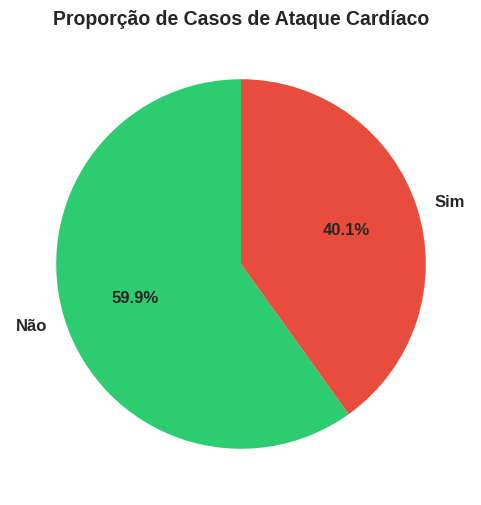

In [126]:
#entender a distribuição da variável alvo 'heart_attack'

target_counts = df['heart_attack'].value_counts()
colors = ['#2ecc71', '#e74c3c']

plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=['Não', 'Sim'], autopct='%1.1f%%',
        startangle=90, colors=colors, textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Proporção de Casos de Ataque Cardíaco', fontsize=14, fontweight='bold')
plt.show()


### 3.4 Distribuição da Variável Alvo

**Importância da Análise de Balanceamento:**

A variável alvo `heart_attack` indica se o paciente sofreu um ataque cardíaco (1) ou não (0). É crucial verificar se as classes estão balanceadas, pois:

- **Dataset desbalanceado** pode fazer o modelo tender a prever sempre a classe majoritária
- **Acurácia pode ser enganosa** em casos de desbalanceamento severo
- **Técnicas especiais** (SMOTE, class weights, etc.) podem ser necessárias se o desbalanceamento for significativo

**Interpretação:**
- Balanceamento ideal: próximo de 50%-50%
- Desbalanceamento leve: 60%-40%
- Desbalanceamento moderado: 70%-30%
- Desbalanceamento severo: acima de 80%-20%

## 4. Análise Exploratória de Dados (EDA)

A Análise Exploratória de Dados é uma etapa crucial para entender os padrões, relações e características do dataset antes de aplicar modelos de Machine Learning.

**Objetivos da EDA:**

1. **Identificar relações entre variáveis e o target**: Quais fatores mais influenciam o risco de ataque cardíaco?
2. **Detectar padrões e tendências**: Existem grupos de risco específicos?
3. **Validar hipóteses clínicas**: Os dados confirmam conhecimentos médicos estabelecidos?
4. **Preparar para feature engineering**: Identificar oportunidades de criar novas variáveis

### 4.1 Análise de Variáveis Categóricas

**Por que analisar variáveis categóricas?**

Variáveis categóricas como `gender`, `smoking_status`, `dietary_habits` etc. frequentemente apresentam forte associação com desfechos clínicos. A análise cruzada dessas variáveis com o target nos permite:

- Identificar **grupos de alto risco** (ex: fumantes, sedentários)
- Entender **fatores modificáveis** que podem ser alvo de intervenções
- Visualizar **proporções de casos positivos** em cada categoria

**Interpretação dos gráficos:**
- Barras vermelhas: percentual de pacientes COM ataque cardíaco
- Barras verdes: percentual de pacientes SEM ataque cardíaco
- Quanto maior a barra vermelha, maior o risco associado àquela categoria

In [127]:
#Identificar variáveis categóricas ou de agrupamento 
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Variáveis Categóricas:")
print(categorical_cols)
print(f"\nTotal: {len(categorical_cols)} variáveis categorizadoras")

Variáveis Categóricas:
['gender', 'region', 'income_level', 'smoking_status', 'alcohol_consumption', 'physical_activity', 'dietary_habits', 'air_pollution_exposure', 'stress_level', 'EKG_results']

Total: 10 variáveis categorizadoras


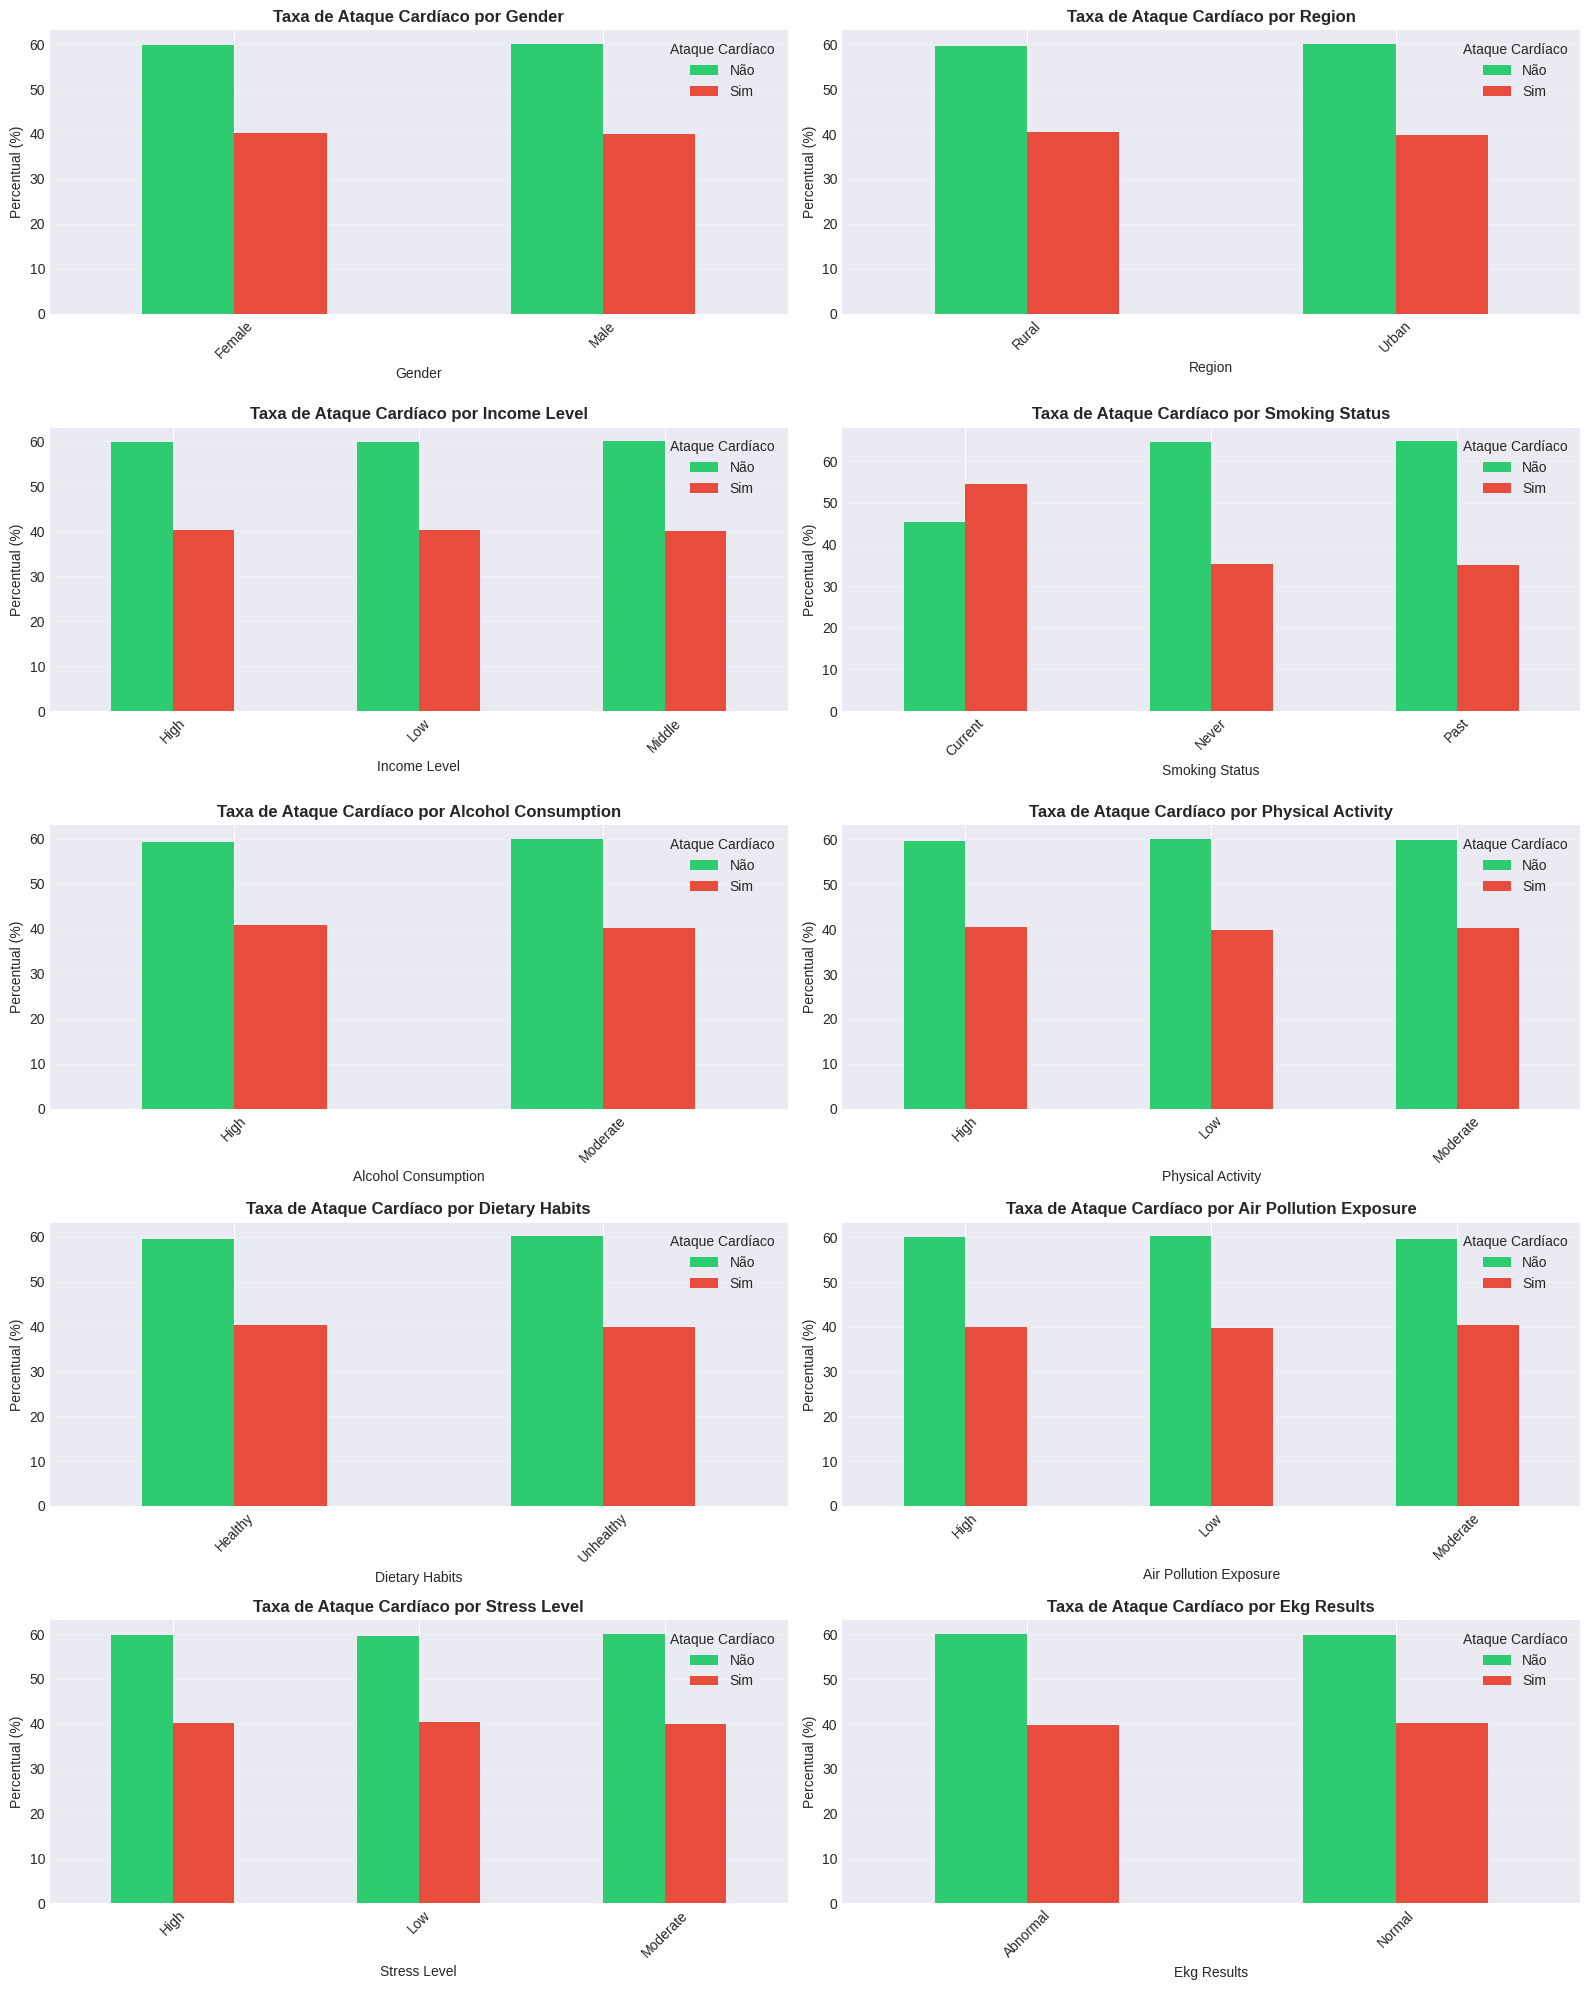

In [128]:
# Análise de variáveis categóricas vs target


fig, axes = plt.subplots(5, 2, figsize=(16, 20))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    if col in df.columns:
        cross_tab = pd.crosstab(df[col], df['heart_attack'], normalize='index') * 100
        cross_tab.plot(kind='bar', ax=axes[idx], color=['#2ecc71', '#e74c3c'])
        axes[idx].set_title(f'Taxa de Ataque Cardíaco por {col.replace("_", " ").title()}', 
                           fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col.replace('_', ' ').title(), fontsize=10)
        axes[idx].set_ylabel('Percentual (%)', fontsize=10)
        axes[idx].legend(['Não', 'Sim'], title='Ataque Cardíaco')
        axes[idx].grid(axis='y', alpha=0.3)
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 4.2 Análise de Variáveis Numéricas

**Importância das Variáveis Numéricas:**

Variáveis numéricas como idade, níveis de colesterol, pressão arterial e glicemia fornecem medidas quantitativas importantes para predição de risco cardiovascular.

**Análises Realizadas:**

1. **Histogramas com separação por target:**
   - Distribuição Verde: pacientes SEM ataque cardíaco
   - Distribuição Vermelha: pacientes COM ataque cardíaco
   - **Objetivo**: Identificar se há diferença nas distribuições entre os grupos

2. **Boxplots por target:**
   - Detectam outliers (pontos fora das caixas)
   - Mostram medianas (linha vermelha) e quartis (caixas)
   - **Objetivo**: Comparar valores típicos entre pacientes com e sem ataque cardíaco

**O que procurar:**
- **Separação clara** entre distribuições → variável potencialmente preditiva
- **Sobreposição total** → variável menos útil para predição
- **Outliers** → casos extremos que podem ser clinicamente relevantes

In [129]:
    # Identificar variáveis numéricas 
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('heart_attack')  # Remover a variável comparativa 

print("Variáveis Numéricas:")
print(numerical_cols)
print(f"\nTotal: {len(numerical_cols)} variáveis numéricas")

Variáveis Numéricas:
['age', 'hypertension', 'diabetes', 'cholesterol_level', 'obesity', 'waist_circumference', 'family_history', 'sleep_hours', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl', 'triglycerides', 'previous_heart_disease', 'medication_usage', 'participated_in_free_screening', 'alcohol_missing']

Total: 18 variáveis numéricas


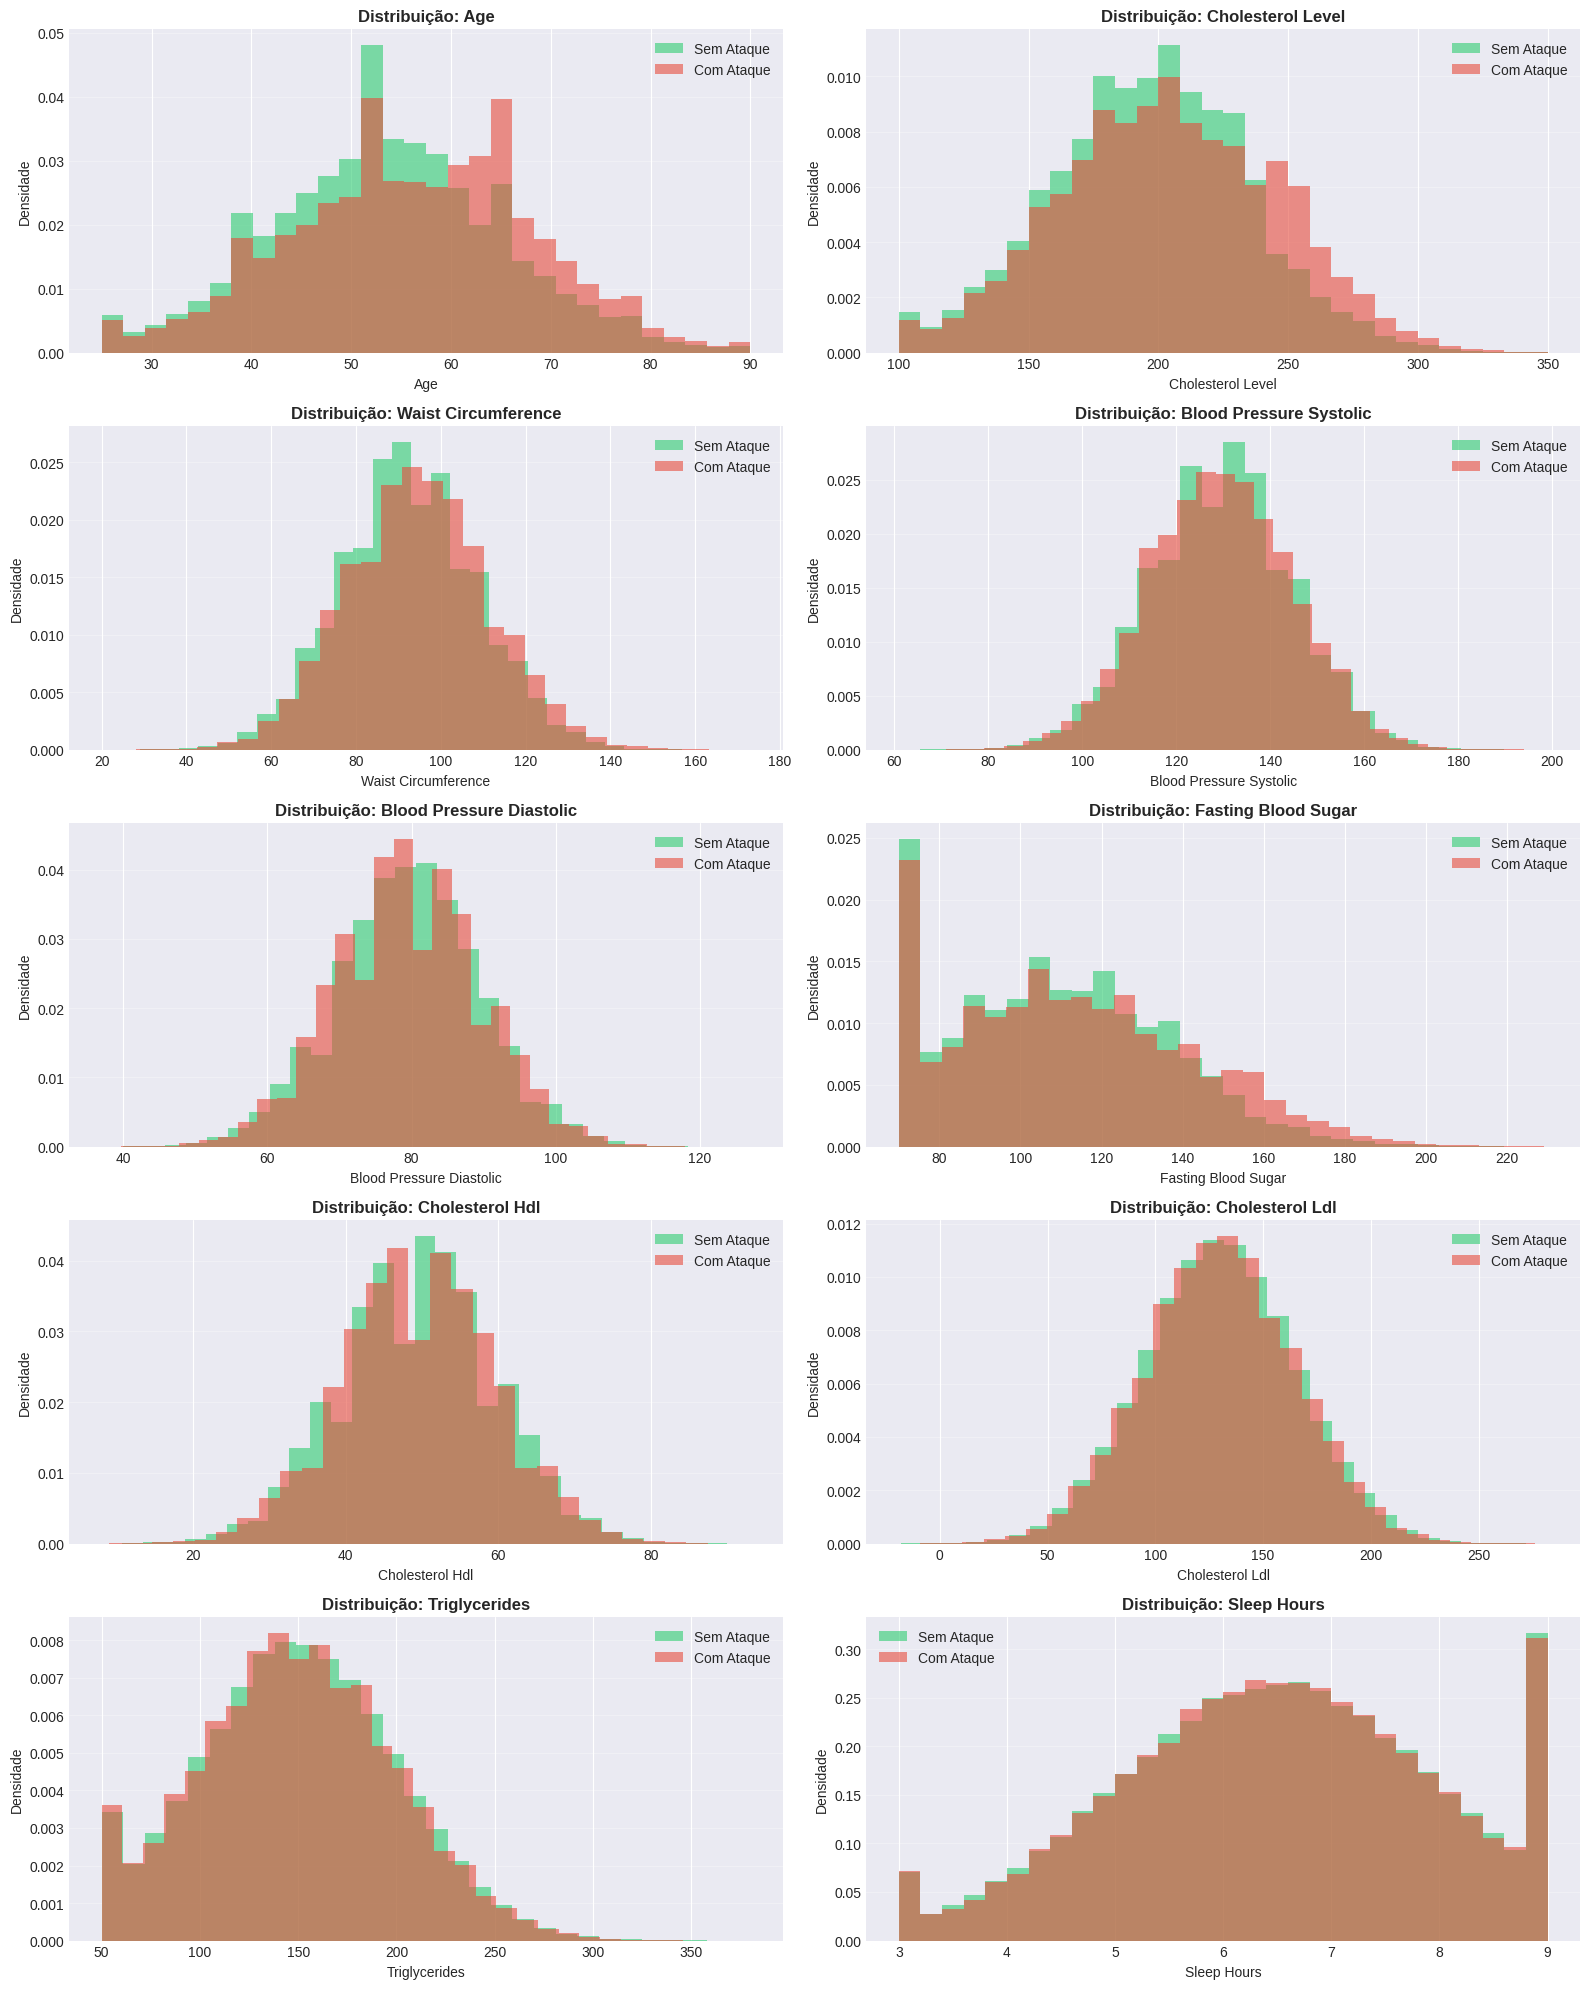

In [130]:
# Distribuição das principais variáveis numéricas
key_numerical = ['age', 'cholesterol_level', 'waist_circumference', 'blood_pressure_systolic',
                'blood_pressure_diastolic', 'fasting_blood_sugar', 'cholesterol_hdl',
                'cholesterol_ldl', 'triglycerides', 'sleep_hours']

fig, axes = plt.subplots(5, 2, figsize=(16, 20))
axes = axes.ravel()

for idx, col in enumerate(key_numerical):
    if col in df.columns:
        # Histograma com KDE
        df[df['heart_attack'] == 0][col].hist(ax=axes[idx], bins=30, alpha=0.6, 
                                               label='Sem Ataque', color='#2ecc71', density=True)
        df[df['heart_attack'] == 1][col].hist(ax=axes[idx], bins=30, alpha=0.6, 
                                               label='Com Ataque', color='#e74c3c', density=True)
        
        axes[idx].set_title(f'Distribuição: {col.replace("_", " ").title()}', 
                           fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col.replace('_', ' ').title(), fontsize=10)
        axes[idx].set_ylabel('Densidade', fontsize=10)
        axes[idx].legend()
        axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
#plt.savefig('numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

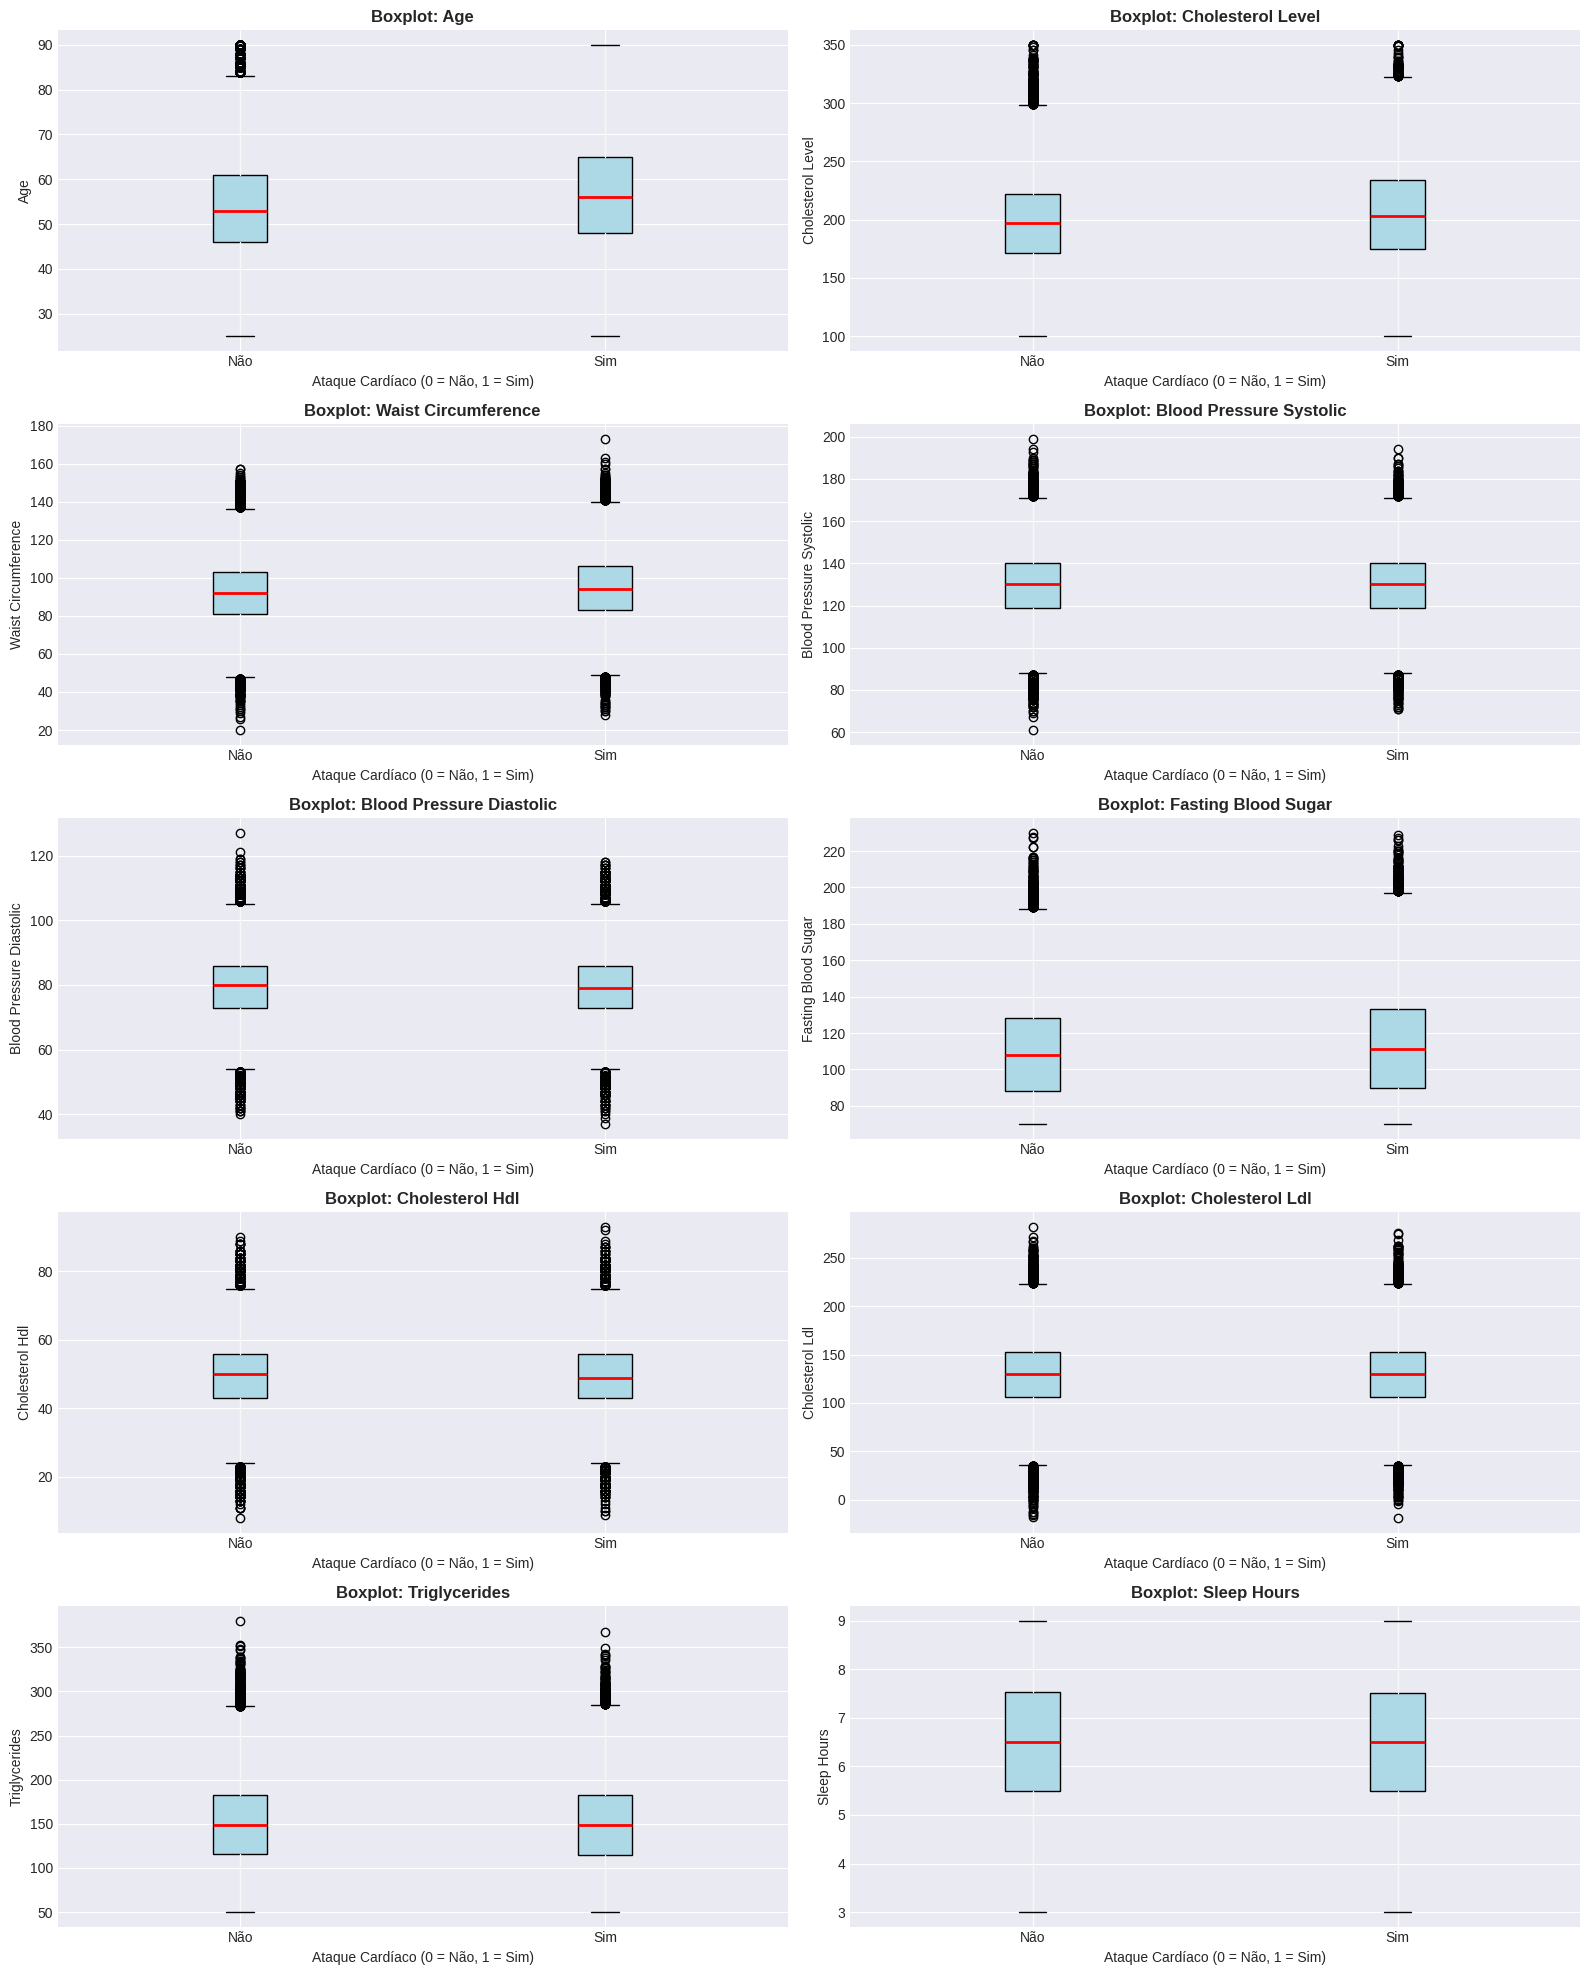

In [131]:
# Boxplots para detectar outliers
fig, axes = plt.subplots(5, 2, figsize=(16, 20))
axes = axes.ravel()

for idx, col in enumerate(key_numerical):
    if col in df.columns:
        df.boxplot(column=col, by='heart_attack', ax=axes[idx], 
                  patch_artist=True, 
                  boxprops=dict(facecolor='lightblue'),
                  medianprops=dict(color='red', linewidth=2))
        axes[idx].set_title(f'Boxplot: {col.replace("_", " ").title()}', 
                           fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Ataque Cardíaco (0 = Não, 1 = Sim)', fontsize=10)
        axes[idx].set_ylabel(col.replace('_', ' ').title(), fontsize=10)
        plt.sca(axes[idx])
        plt.xticks([1, 2], ['Não', 'Sim'])

plt.suptitle('')  # Remove o título automático do pandas
plt.tight_layout()
#plt.savefig('numerical_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

### 4.3 Análise de Correlação

**O que é Correlação?**

A correlação mede a força e direção da relação linear entre duas variáveis, variando de -1 a +1:

- **+1**: correlação positiva perfeita (quando uma aumenta, a outra também aumenta)
- **0**: sem correlação linear
- **-1**: correlação negativa perfeita (quando uma aumenta, a outra diminui)

**Interpretação dos Valores:**
- 0.0 - 0.2: correlação muito fraca
- 0.2 - 0.4: correlação fraca
- 0.4 - 0.6: correlação moderada
- 0.6 - 0.8: correlação forte
- 0.8 - 1.0: correlação muito forte

**Por que isso importa?**

1. **Seleção de features**: Variáveis altamente correlacionadas com o target são bons preditores
2. **Multicolinearidade**: Variáveis muito correlacionadas entre si podem causar problemas em alguns modelos
3. **Insights clínicos**: Confirmar ou descobrir relações entre fatores de risco

**Nota Importante**: Correlação não implica causalidade! Uma correlação forte não significa que uma variável causa a outra.

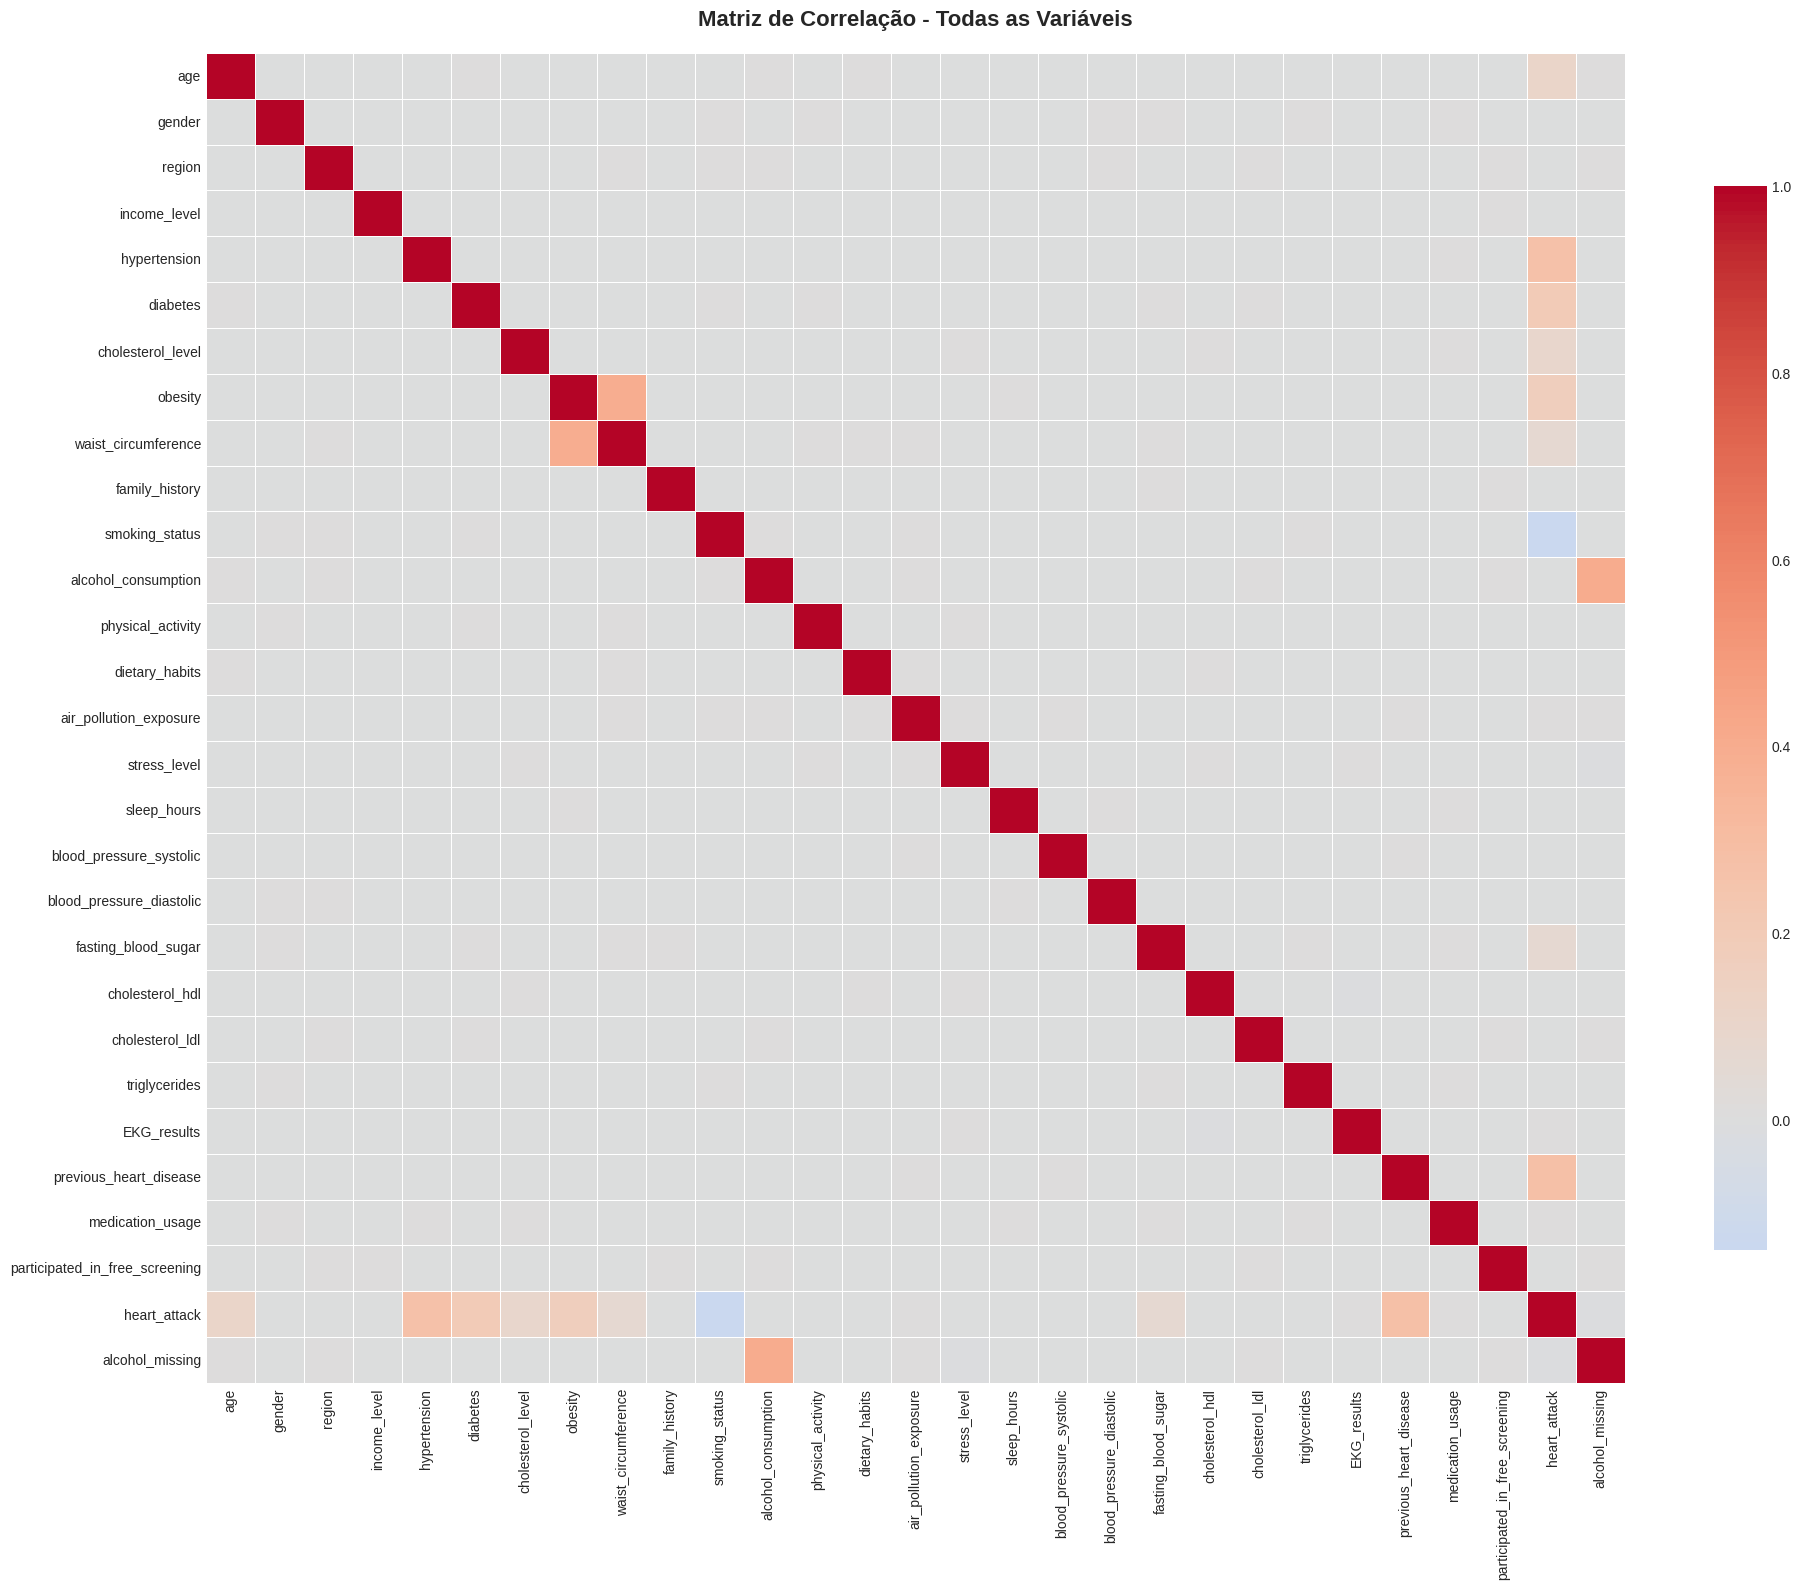

In [132]:
# Criar uma cópia do dataframe para análise de correlação
df_corr = df.copy()

# Codificar variáveis categóricas para análise de correlação
le = LabelEncoder()
for col in categorical_cols:
    if col in df_corr.columns:
        df_corr[col] = le.fit_transform(df_corr[col].astype(str))

# Calcular matriz de correlação
correlation_matrix = df_corr.corr()

# Visualizar matriz de correlação completa
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Todas as Variáveis', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
#plt.savefig('correlation_matrix_full.png', dpi=300, bbox_inches='tight')
plt.show()

CORRELAÇÃO DAS VARIÁVEIS COM HEART_ATTACK (em %)
heart_attack                      100.00
previous_heart_disease             27.48
hypertension                       26.93
diabetes                           19.45
obesity                            17.17
age                                10.58
cholesterol_level                   9.26
fasting_blood_sugar                 6.98
waist_circumference                 6.79
medication_usage                    0.47
air_pollution_exposure              0.39
EKG_results                         0.26
family_history                      0.14
sleep_hours                         0.07
cholesterol_hdl                     0.06
cholesterol_ldl                     0.06
blood_pressure_diastolic           -0.03
triglycerides                      -0.07
physical_activity                  -0.08
blood_pressure_systolic            -0.16
income_level                       -0.19
stress_level                       -0.34
gender                             -0.35
particip

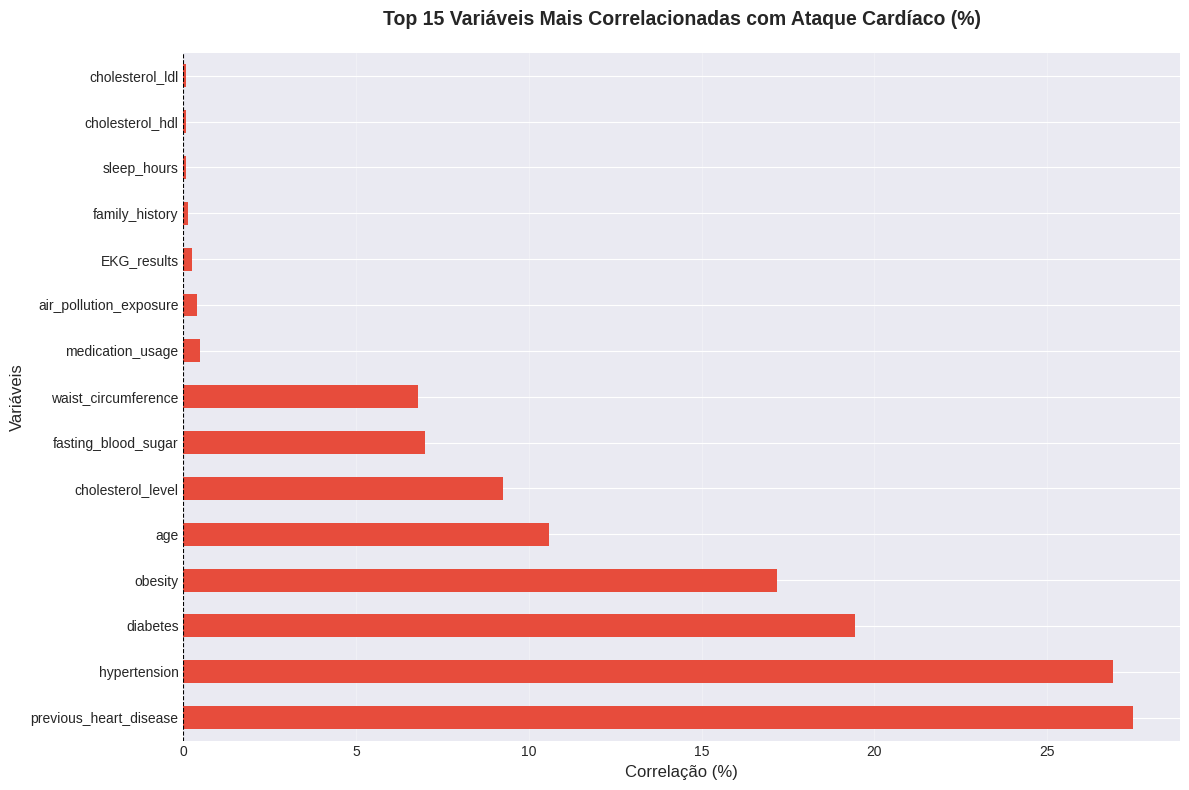

In [133]:
# Correlação com a variável target
target_correlation = correlation_matrix['heart_attack'].sort_values(ascending=False)

# Converter correlação em porcentagem
target_correlation_percent = target_correlation * 100

print("CORRELAÇÃO DAS VARIÁVEIS COM HEART_ATTACK (em %)")
print(target_correlation_percent.round(2))  # Arredondar para 2 casas decimais

# Visualizar top 15 correlações com o target
plt.figure(figsize=(12, 8))
top_corr = target_correlation_percent[1:16]  # Excluir a própria variável target

# Cores para correlações positivas e negativas
colors = ['#e74c3c' if x > 0 else '#3498db' for x in top_corr]

# Gráfico
top_corr.plot(kind='barh', color=colors)
plt.title('Top 15 Variáveis Mais Correlacionadas com Ataque Cardíaco (%)', 
         fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Correlação (%)', fontsize=12)
plt.ylabel('Variáveis', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Pré-processamento de Dados

O pré-processamento é uma etapa fundamental que transforma os dados brutos em um formato adequado para os algoritmos de Machine Learning.

**Por que pré-processar?**

1. **Modelos de ML não entendem texto**: Variáveis categóricas precisam ser convertidas em números
2. **Escalas diferentes prejudicam o aprendizado**: Variáveis com escalas muito diferentes (ex: idade 0-100 vs triglicerídeos 0-500) precisam ser normalizadas
3. **Divisão treino/teste previne vazamento de dados**: Garante que o modelo seja avaliado em dados "novos"

### 5.1 Tratamento de Valores Ausentes e Inconsistências

**Estratégia de Tratamento:**

Nesta seção, verificamos a existência de valores inconsistentes que possam ter passado pela limpeza inicial, como:
- Valores negativos em variáveis que não deveriam tê-los
- Valores fora de faixas biologicamente plausíveis
- Padrões inesperados que possam indicar erros de coleta

**Princípio**: Sempre validar os dados antes de alimentar o modelo!

In [134]:
# Verificar valores inconsistentes em variáveis numéricas

print("VERIFICAÇÃO DE VALORES INCONSISTENTES")
# Verificar valores negativos onde não deveriam existir
numerical_positive = ['age', 'cholesterol_level', 'waist_circumference', 'blood_pressure_systolic',
                     'blood_pressure_diastolic', 'fasting_blood_sugar', 'cholesterol_hdl',
                     'cholesterol_ldl', 'triglycerides', 'sleep_hours']

for col in numerical_positive:
    if col in df.columns:
        negative_count = (df[col] < 0).sum()
        if negative_count > 0:
            print(f"⚠️ {col}: {negative_count} valores negativos encontrados")
        else:
            print(f"✓ {col}: Sem valores negativos")

print("\n✓ Verificação de inconsistências concluída.")

VERIFICAÇÃO DE VALORES INCONSISTENTES
✓ age: Sem valores negativos
✓ cholesterol_level: Sem valores negativos
✓ waist_circumference: Sem valores negativos
✓ blood_pressure_systolic: Sem valores negativos
✓ blood_pressure_diastolic: Sem valores negativos
✓ fasting_blood_sugar: Sem valores negativos
✓ cholesterol_hdl: Sem valores negativos
⚠️ cholesterol_ldl: 14 valores negativos encontrados
✓ triglycerides: Sem valores negativos
✓ sleep_hours: Sem valores negativos

✓ Verificação de inconsistências concluída.


### 5.2 Pipeline de Pré-processamento

O pipeline de pré-processamento organiza de forma sequencial todas as transformações necessárias nos dados.

**Etapas do Pipeline:**

1. **Separação X (features) e y (target)**: Isolar a variável que queremos prever
2. **Codificação de variáveis categóricas**: Converter texto em números (Label Encoding)
3. **Divisão treino/validação/teste**: Criar conjuntos independentes para treinamento e avaliação
4. **Normalização**: Padronizar as escalas das variáveis numéricas

**Por que dividir em 3 conjuntos?**

- **Treino (70%)**: Usado para treinar o modelo
- **Validação (15%)**: Usado para ajustar hiperparâmetros e comparar modelos
- **Teste (15%)**: Usado APENAS no final para avaliação imparcial do melhor modelo

Isso previne overfitting e fornece uma estimativa realista do desempenho em produção.

In [135]:
# Separar features e target
X = df.drop('heart_attack', axis=1)
y = df['heart_attack']


print("SEPARAÇÃO DE FEATURES E TARGET")

print(f"Shape de X (features): {X.shape}")
print(f"Shape de y (target): {y.shape}")
print(f"\nDistribuição do target:")
print(y.value_counts())

print("\nDistribuição do target (em %):")
print((y.value_counts(normalize=True) * 100).round(2))

SEPARAÇÃO DE FEATURES E TARGET
Shape de X (features): (158355, 28)
Shape de y (target): (158355,)

Distribuição do target:
heart_attack
0    94854
1    63501
Name: count, dtype: int64

Distribuição do target (em %):
heart_attack
0    59.9
1    40.1
Name: proportion, dtype: float64


In [136]:
# Codificar variáveis categóricas

print("CODIFICAÇÃO DE VARIÁVEIS CATEGÓRICAS")


X_encoded = X.copy()
label_encoders = {}

for col in categorical_cols:
    if col in X_encoded.columns:
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
        label_encoders[col] = le
        print(f"✓ {col}: {len(le.classes_)} categorias codificadas")

print(f"\n✓ Total de {len(label_encoders)} variáveis categóricas codificadas.")

CODIFICAÇÃO DE VARIÁVEIS CATEGÓRICAS
✓ gender: 2 categorias codificadas
✓ region: 2 categorias codificadas
✓ income_level: 3 categorias codificadas
✓ smoking_status: 3 categorias codificadas
✓ alcohol_consumption: 2 categorias codificadas
✓ physical_activity: 3 categorias codificadas
✓ dietary_habits: 2 categorias codificadas
✓ air_pollution_exposure: 3 categorias codificadas
✓ stress_level: 3 categorias codificadas
✓ EKG_results: 2 categorias codificadas

✓ Total de 10 variáveis categóricas codificadas.


In [137]:
# Divisão em conjuntos de treino, validação e teste

print("DIVISÃO DOS DADOS: TREINO, VALIDAÇÃO E TESTE")
print("="*80)

# Primeiro split: 70% treino, 30% temporário (validação + teste)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)

# Segundo split: dividir os 30% em 15% validação e 15% teste
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"Conjunto de Treino: {X_train.shape[0]} amostras ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Conjunto de Validação: {X_val.shape[0]} amostras ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Conjunto de Teste: {X_test.shape[0]} amostras ({X_test.shape[0]/len(X)*100:.1f}%)")

print("\nDistribuição do target em cada conjunto:")
print(f"Treino: {y_train.value_counts().to_dict()}")
print(f"Validação: {y_val.value_counts().to_dict()}")
print(f"Teste: {y_test.value_counts().to_dict()}")

DIVISÃO DOS DADOS: TREINO, VALIDAÇÃO E TESTE
Conjunto de Treino: 110848 amostras (70.0%)
Conjunto de Validação: 23753 amostras (15.0%)
Conjunto de Teste: 23754 amostras (15.0%)

Distribuição do target em cada conjunto:
Treino: {0: 66398, 1: 44450}
Validação: {0: 14228, 1: 9525}
Teste: {0: 14228, 1: 9526}


In [138]:
# Normalização das features

print("NORMALIZAÇÃO DAS FEATURES")
print("="*80)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("✓ Features normalizadas usando StandardScaler")
print(f"\nMédia das features após normalização (treino): {X_train_scaled.mean():.6f}")
print(f"Desvio padrão das features após normalização (treino): {X_train_scaled.std():.6f}")

NORMALIZAÇÃO DAS FEATURES
✓ Features normalizadas usando StandardScaler

Média das features após normalização (treino): 0.000000
Desvio padrão das features após normalização (treino): 1.000000


## 6. Modelagem de Machine Learning

A modelagem é o coração do projeto, onde aplicamos algoritmos que aprendem padrões dos dados para fazer predições.

**Estratégia de Modelagem:**

Testaremos múltiplos algoritmos para identificar qual tem melhor desempenho neste problema específico. Cada algoritmo tem características diferentes:

### 6.1 Seleção e Treinamento de Modelos

**Modelos Selecionados:**

1. **Regressão Logística**
   - **Tipo**: Linear
   - **Vantagens**: Simples, rápido, muito interpretável
   - **Quando usar**: Baseline, relações lineares
   - **Interpretação**: Coeficientes mostram impacto de cada variável

2. **Árvore de Decisão**
   - **Tipo**: Não-linear, baseado em regras
   - **Vantagens**: Fácil interpretação, captura interações
   - **Desvantagens**: Tende a overfitting
   - **Interpretação**: Sequência de decisões em forma de árvore

3. **Random Forest**
   - **Tipo**: Ensemble de árvores
   - **Vantagens**: Robusto, lida bem com não-linearidades, reduz overfitting
   - **Como funciona**: Combina múltiplas árvores de decisão
   - **Interpretação**: Feature importance mostra variáveis mais relevantes

4. **K-Nearest Neighbors (KNN)**
   - **Tipo**: Baseado em instâncias
   - **Vantagens**: Simples, não paramétrico
   - **Como funciona**: Classifica baseado nos K vizinhos mais próximos
   - **Desvantagens**: Sensível à escala e ao valor de K

**Métricas de Avaliação:**

- **Accuracy**: % de predições corretas (cuidado com desbalanceamento!)
- **Precision**: Dos que o modelo disse "sim", quantos estavam certos?
- **Recall**: Dos que eram "sim", quantos o modelo acertou?
- **F1-Score**: Média harmônica entre Precision e Recall (MÉTRICA PRINCIPAL)
- **ROC-AUC**: Capacidade de separar as classes em diferentes thresholds

In [139]:
# Definir modelos a serem testados
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    #'SVM': SVC(random_state=42, probability=True)
}


print("MODELOS SELECIONADOS PARA TREINAMENTO")

for i, (name, model) in enumerate(models.items(), 1):
    print(f"{i}. {name}")

MODELOS SELECIONADOS PARA TREINAMENTO
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. KNN


In [140]:
# Treinar e avaliar modelos
print("\n" + "="*80)
print("TREINAMENTO E AVALIAÇÃO DOS MODELOS")


results = []
trained_models = {}

for name, model in models.items():
    print(f"\n{'='*80}")
    print(f"Treinando: {name}")
    print(f"{'='*80}")
    
    # Treinar o modelo
    model.fit(X_train_scaled, y_train)
    
    # Predições no conjunto de validação
    y_val_pred = model.predict(X_val_scaled)
    y_val_pred_proba = model.predict_proba(X_val_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calcular métricas
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    roc_auc = roc_auc_score(y_val, y_val_pred_proba) if y_val_pred_proba is not None else None
    
    # Armazenar resultados
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })
    
    trained_models[name] = model
    
    print(f"✓ Accuracy: {accuracy:.4f}")
    print(f"✓ Precision: {precision:.4f}")
    print(f"✓ Recall: {recall:.4f}")
    print(f"✓ F1-Score: {f1:.4f}")
    if roc_auc:
        print(f"✓ ROC-AUC: {roc_auc:.4f}")

# Criar DataFrame com resultados
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1-Score', ascending=False)


print("RESUMO COMPARATIVO DOS MODELOS (CONJUNTO DE VALIDAÇÃO)")

print(results_df.to_string(index=False))


TREINAMENTO E AVALIAÇÃO DOS MODELOS

Treinando: Logistic Regression
✓ Accuracy: 0.7312
✓ Precision: 0.6973
✓ Recall: 0.5827
✓ F1-Score: 0.6349
✓ ROC-AUC: 0.7999

Treinando: Decision Tree
✓ Accuracy: 0.6549
✓ Precision: 0.5688
✓ Recall: 0.5765
✓ F1-Score: 0.5726
✓ ROC-AUC: 0.6420

Treinando: Random Forest
✓ Accuracy: 0.7336
✓ Precision: 0.6950
✓ Recall: 0.5982
✓ F1-Score: 0.6430
✓ ROC-AUC: 0.8110

Treinando: KNN
✓ Accuracy: 0.6804
✓ Precision: 0.6340
✓ Recall: 0.4801
✓ F1-Score: 0.5464
✓ ROC-AUC: 0.7173
RESUMO COMPARATIVO DOS MODELOS (CONJUNTO DE VALIDAÇÃO)
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
      Random Forest  0.733634   0.695048 0.598215  0.643006 0.811019
Logistic Regression  0.731234   0.697324 0.582677  0.634866 0.799857
      Decision Tree  0.654949   0.568839 0.576483  0.572635 0.641981
                KNN  0.680377   0.633994 0.480105  0.546421 0.717318


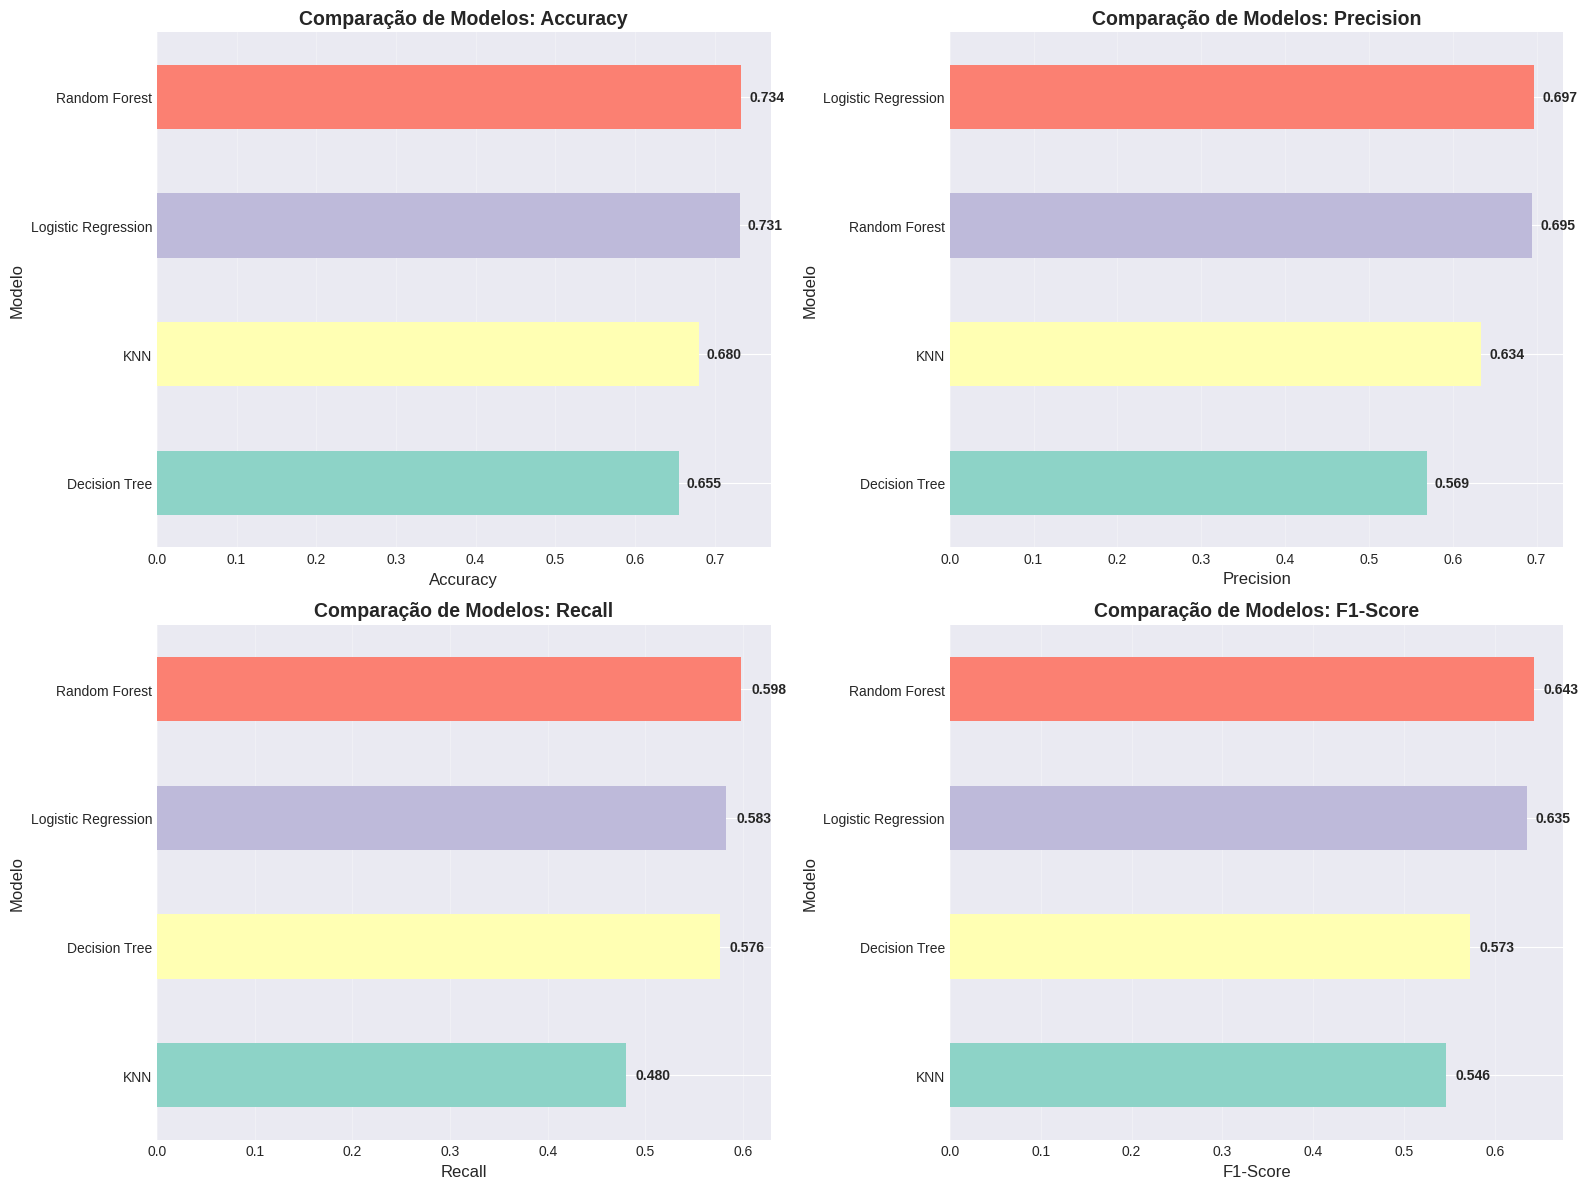

In [141]:
# Visualizar comparação de modelos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors_palette = plt.cm.Set3(range(len(results_df)))

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    results_df_sorted = results_df.sort_values(metric, ascending=True)
    results_df_sorted.plot(x='Model', y=metric, kind='barh', ax=ax, 
                          color=colors_palette, legend=False)
    ax.set_title(f'Comparação de Modelos: {metric}', fontsize=14, fontweight='bold')
    ax.set_xlabel(metric, fontsize=12)
    ax.set_ylabel('Modelo', fontsize=12)
    ax.grid(axis='x', alpha=0.3)
    
    # Adicionar valores nas barras
    for i, v in enumerate(results_df_sorted[metric]):
        ax.text(v + 0.01, i, f'{v:.3f}', va='center', fontweight='bold')

plt.tight_layout()

plt.show()

In [142]:
# Selecionar o melhor modelo baseado no F1-Score
best_model_name = results_df.iloc[0]['Model']
best_model = trained_models[best_model_name]


print("MELHOR MODELO SELECIONADO")
print(f"Modelo: {best_model_name}")
print(f"F1-Score: {results_df.iloc[0]['F1-Score']:.4f}")
print(f"\nParâmetros atuais:")
print(best_model.get_params())

MELHOR MODELO SELECIONADO
Modelo: Random Forest
F1-Score: 0.6430

Parâmetros atuais:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [143]:
# Avaliação final no conjunto de teste

print("AVALIAÇÃO FINAL NO CONJUNTO DE TESTE")


y_test_pred = best_model.predict(X_test_scaled)
y_test_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1] if hasattr(best_model, 'predict_proba') else None

# Métricas finais
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba) if y_test_pred_proba is not None else None

print(f"\nModelo: {best_model_name}")
print(f"{'='*80}")
print(f"Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Precision: {test_precision:.4f} ({test_precision*100:.2f}%)")
print(f"Recall: {test_recall:.4f} ({test_recall*100:.2f}%)")
print(f"F1-Score: {test_f1:.4f} ({test_f1*100:.2f}%)")
if test_roc_auc:
    print(f"ROC-AUC: {test_roc_auc:.4f} ({test_roc_auc*100:.2f}%)")

AVALIAÇÃO FINAL NO CONJUNTO DE TESTE

Modelo: Random Forest
Accuracy: 0.7291 (72.91%)
Precision: 0.6892 (68.92%)
Recall: 0.5907 (59.07%)
F1-Score: 0.6362 (63.62%)
ROC-AUC: 0.8061 (80.61%)


In [144]:
# Relatório de classificação detalhado
print("\n" + "="*80)
print("RELATÓRIO DE CLASSIFICAÇÃO DETALHADO")

print(classification_report(y_test, y_test_pred, target_names=['Sem Ataque (0)', 'Com Ataque (1)']))


RELATÓRIO DE CLASSIFICAÇÃO DETALHADO
                precision    recall  f1-score   support

Sem Ataque (0)       0.75      0.82      0.78     14228
Com Ataque (1)       0.69      0.59      0.64      9526

      accuracy                           0.73     23754
     macro avg       0.72      0.71      0.71     23754
  weighted avg       0.73      0.73      0.72     23754



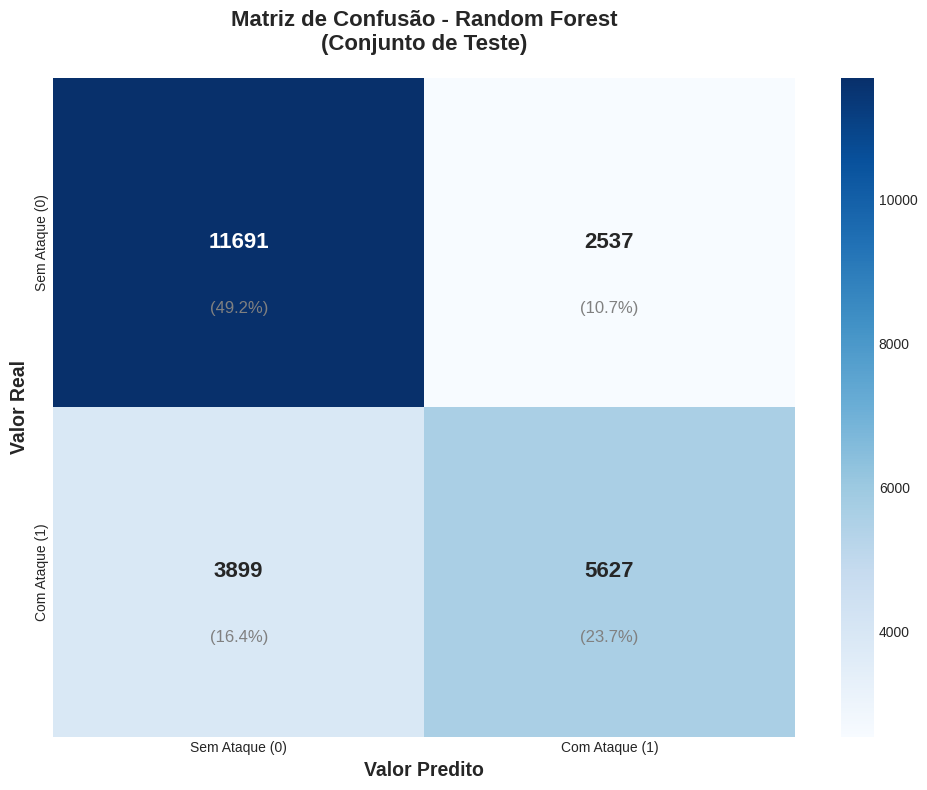


ANÁLISE DA MATRIZ DE CONFUSÃO
Verdadeiros Negativos (TN): 11691 - Pacientes sem ataque corretamente identificados
Falsos Positivos (FP): 2537 - Pacientes sem ataque identificados incorretamente como com ataque
Falsos Negativos (FN): 3899 - Pacientes com ataque identificados incorretamente como sem ataque
Verdadeiros Positivos (TP): 5627 - Pacientes com ataque corretamente identificados

⚠️ Taxa de Falsos Negativos: 40.93% - Casos críticos não detectados
⚠️ Taxa de Falsos Positivos: 17.83% - Alarmes falsos


In [145]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Sem Ataque (0)', 'Com Ataque (1)'],
            yticklabels=['Sem Ataque (0)', 'Com Ataque (1)'],
            annot_kws={'size': 16, 'weight': 'bold'})
plt.title(f'Matriz de Confusão - {best_model_name}\n(Conjunto de Teste)', 
         fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Valor Real', fontsize=14, fontweight='bold')
plt.xlabel('Valor Predito', fontsize=14, fontweight='bold')

# Adicionar percentuais
for i in range(2):
    for j in range(2):
        percentage = cm[i, j] / cm.sum() * 100
        plt.text(j + 0.5, i + 0.7, f'({percentage:.1f}%)', 
                ha='center', va='center', fontsize=12, color='gray')

plt.tight_layout()
#plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Análise da matriz de confusão
tn, fp, fn, tp = cm.ravel()
print("\n" + "="*80)
print("ANÁLISE DA MATRIZ DE CONFUSÃO")

print(f"Verdadeiros Negativos (TN): {tn} - Pacientes sem ataque corretamente identificados")
print(f"Falsos Positivos (FP): {fp} - Pacientes sem ataque identificados incorretamente como com ataque")
print(f"Falsos Negativos (FN): {fn} - Pacientes com ataque identificados incorretamente como sem ataque")
print(f"Verdadeiros Positivos (TP): {tp} - Pacientes com ataque corretamente identificados")
print(f"\n⚠️ Taxa de Falsos Negativos: {fn/(fn+tp)*100:.2f}% - Casos críticos não detectados")
print(f"⚠️ Taxa de Falsos Positivos: {fp/(fp+tn)*100:.2f}% - Alarmes falsos")

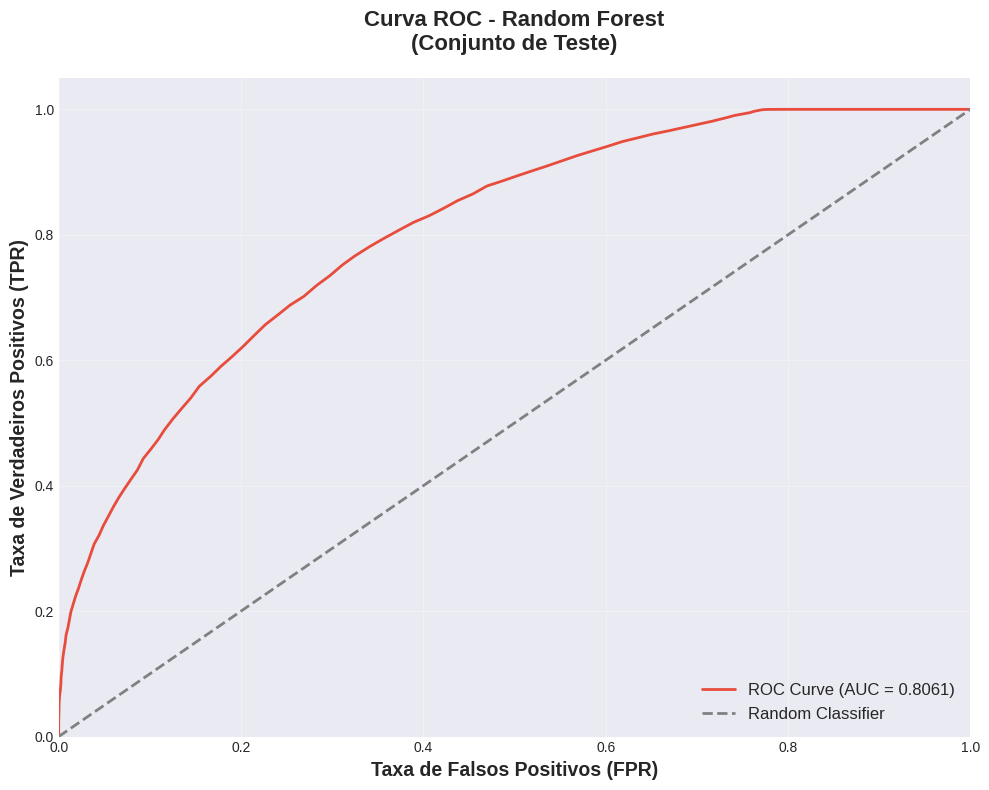

In [146]:
# Curva ROC
if y_test_pred_proba is not None:
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
    
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='#e74c3c', linewidth=2, label=f'ROC Curve (AUC = {test_roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=2, label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos (FPR)', fontsize=14, fontweight='bold')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=14, fontweight='bold')
    plt.title(f'Curva ROC - {best_model_name}\n(Conjunto de Teste)', 
             fontsize=16, fontweight='bold', pad=20)
    plt.legend(loc='lower right', fontsize=12)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    #plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')
    plt.show()

## 7. Interpretabilidade do Modelo

**Por que Interpretabilidade é Crucial em Saúde?**

Em aplicações médicas, não basta que o modelo faça predições corretas - precisamos entender **POR QUE** ele fez determinada predição:

1. **Confiança Médica**: Profissionais de saúde precisam entender a lógica por trás da recomendação
2. **Validação Clínica**: Verificar se o modelo está usando fatores clinicamente relevantes
3. **Detecção de Viés**: Identificar se o modelo aprendeu padrões espúrios ou discriminatórios
4. **Regulamentação**: Muitas jurisdições exigem explicabilidade em sistemas de apoio à decisão médica

**Técnicas de Interpretabilidade:**

### 7.1 Feature Importance

**O que é?**
Mede a importância relativa de cada variável para as predições do modelo.

**Como interpretar:**
- **Valores altos**: A variável tem grande influência nas predições
- **Valores baixos**: A variável contribui pouco para o modelo

**Para modelos baseados em árvore (Random Forest, Decision Tree):**
- Importância calculada pela redução média de impureza (Gini)

**Para modelos lineares (Regressão Logística):**
- Coeficientes absolutos indicam a força da associação
- Coeficientes positivos: aumento da variável aumenta probabilidade de ataque
- Coeficientes negativos: aumento da variável diminui probabilidade de ataque

ANÁLISE DE IMPORTÂNCIA DAS FEATURES

Top 15 Features Mais Importantes:
                 Feature  Importance
       cholesterol_level    0.077803
  previous_heart_disease    0.074597
            hypertension    0.071005
                     age    0.068345
     fasting_blood_sugar    0.065455
             sleep_hours    0.061919
           triglycerides    0.059904
         cholesterol_ldl    0.059791
     waist_circumference    0.056590
 blood_pressure_systolic    0.055680
blood_pressure_diastolic    0.053143
         cholesterol_hdl    0.053024
                diabetes    0.036890
          smoking_status    0.035067
                 obesity    0.027441


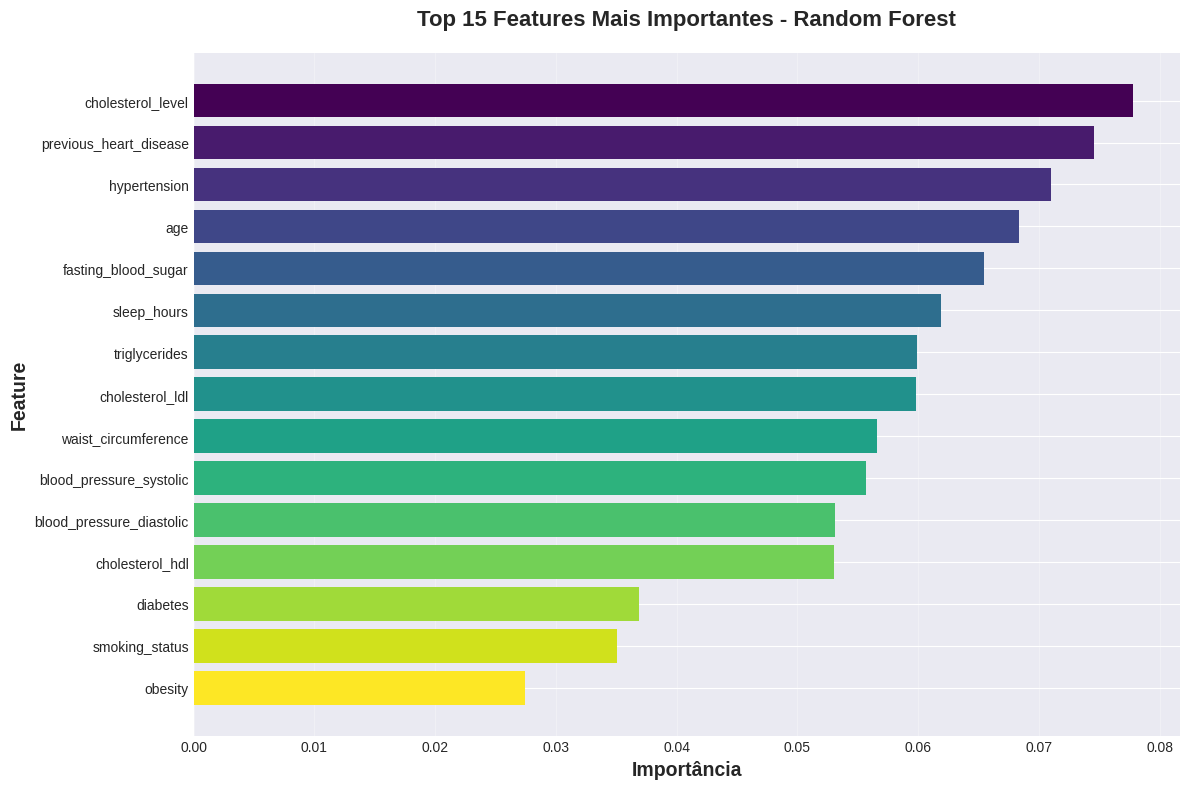

In [147]:
# Feature Importance

print("ANÁLISE DE IMPORTÂNCIA DAS FEATURES")


feature_names = X.columns.tolist()

if hasattr(best_model, 'feature_importances_'):
    # Para modelos baseados em árvore
    importances = best_model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    print("\nTop 15 Features Mais Importantes:")
    print(feature_importance_df.head(15).to_string(index=False))
    
    # Visualização
    plt.figure(figsize=(12, 8))
    top_features = feature_importance_df.head(15)
    colors = plt.cm.viridis(np.linspace(0, 1, len(top_features)))
    plt.barh(range(len(top_features)), top_features['Importance'], color=colors)
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Importância', fontsize=14, fontweight='bold')
    plt.ylabel('Feature', fontsize=14, fontweight='bold')
    plt.title(f'Top 15 Features Mais Importantes - {best_model_name}', 
             fontsize=16, fontweight='bold', pad=20)
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    #plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()
    
elif hasattr(best_model, 'coef_'):
    # Para modelos lineares
    coefficients = best_model.coef_[0]
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients,
        'Abs_Coefficient': np.abs(coefficients)
    }).sort_values('Abs_Coefficient', ascending=False)
    
    print("\nTop 15 Features Mais Importantes (por coeficiente):")
    print(feature_importance_df.head(15)[['Feature', 'Coefficient']].to_string(index=False))
    
    # Visualização
    plt.figure(figsize=(12, 8))
    top_features = feature_importance_df.head(15)
    colors = ['#e74c3c' if x > 0 else '#3498db' for x in top_features['Coefficient']]
    plt.barh(range(len(top_features)), top_features['Coefficient'], color=colors)
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Coeficiente', fontsize=14, fontweight='bold')
    plt.ylabel('Feature', fontsize=14, fontweight='bold')
    plt.title(f'Top 15 Features Mais Importantes - {best_model_name}', 
             fontsize=16, fontweight='bold', pad=20)
    plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    #plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("Feature importance não disponível para este modelo.")
    print("Utilizando Permutation Importance...")
    
    perm_importance = permutation_importance(
        best_model, X_test_scaled, y_test, 
        n_repeats=10, random_state=42, n_jobs=-1
    )
    
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': perm_importance.importances_mean
    }).sort_values('Importance', ascending=False)
    
    print("\nTop 15 Features Mais Importantes (Permutation Importance):")
    print(feature_importance_df.head(15).to_string(index=False))
    
    # Visualização
    plt.figure(figsize=(12, 8))
    top_features = feature_importance_df.head(15)
    colors = plt.cm.viridis(np.linspace(0, 1, len(top_features)))
    plt.barh(range(len(top_features)), top_features['Importance'], color=colors)
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Importância (Permutation)', fontsize=14, fontweight='bold')
    plt.ylabel('Feature', fontsize=14, fontweight='bold')
    plt.title(f'Top 15 Features Mais Importantes - {best_model_name}', 
             fontsize=16, fontweight='bold', pad=20)
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

### 7.2 Análise SHAP (SHapley Additive exPlanations)

**O que é SHAP?**

SHAP é uma técnica avançada de interpretabilidade baseada em teoria dos jogos que explica a contribuição de cada feature para predições individuais.

**Diferença entre Feature Importance e SHAP:**

- **Feature Importance**: Importância global - qual variável é mais importante no geral?
- **SHAP**: Pode mostrar importância tanto global quanto local - como cada variável contribuiu para UMA predição específica?

**Como interpretar os gráficos SHAP:**

1. **SHAP Summary Plot (Barras):**
   - Mostra features ordenadas por importância média absoluta
   - Quanto maior a barra, mais importante a feature

2. **SHAP Summary Plot (Detalhado):**
   - Cada ponto é uma predição
   - Cor: valor da feature (vermelho = alto, azul = baixo)
   - Posição horizontal: impacto SHAP (direita = aumenta probabilidade de ataque)
   - **Exemplo de interpretação**: Se "age" tem muitos pontos vermelhos à direita, significa que idades altas aumentam o risco de ataque cardíaco

**Valor de SHAP:**
- Fornece explicações consistentes e teoricamente fundamentadas
- Permite explicar predições individuais para pacientes específicos
- Ajuda a identificar interações entre variáveis

ANÁLISE SHAP - INTERPRETABILIDADE DO MODELO

Calculando valores SHAP (pode levar alguns minutos)...
✓ Valores SHAP calculados com sucesso!


<Figure size 1200x800 with 0 Axes>

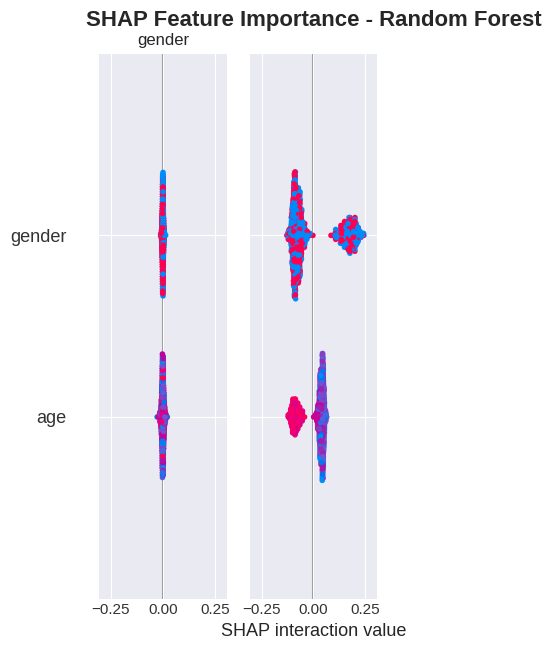

<Figure size 1200x800 with 0 Axes>

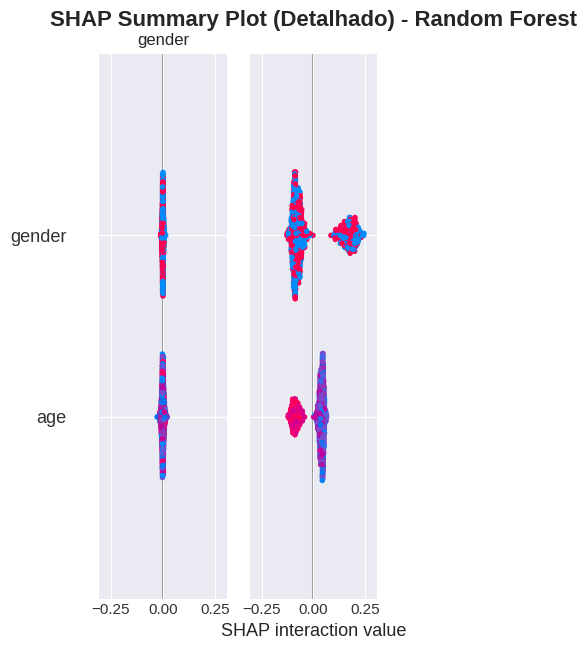

In [148]:
# Análise SHAP

print("ANÁLISE SHAP - INTERPRETABILIDADE DO MODELO")

print("\nCalculando valores SHAP (pode levar alguns minutos)...")

# Usar uma amostra para acelerar o cálculo
sample_size = min(1000, len(X_test_scaled))
X_test_sample = X_test_scaled[:sample_size]

try:
    # Criar explainer apropriado para o tipo de modelo
    if best_model_name in ['Random Forest', 'Decision Tree']:
        explainer = shap.TreeExplainer(best_model)
        shap_values = explainer.shap_values(X_test_sample)
        # Para classificação binária, pegar os valores da classe positiva
        if isinstance(shap_values, list):
            shap_values = shap_values[1]
    else:
        explainer = shap.KernelExplainer(best_model.predict_proba, X_train_scaled[:100])
        shap_values = explainer.shap_values(X_test_sample)
        if isinstance(shap_values, list):
            shap_values = shap_values[1]
    
    print("✓ Valores SHAP calculados com sucesso!")
    
    # Summary plot
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_test_sample, feature_names=feature_names, 
                     plot_type="bar", show=False)
    plt.title(f'SHAP Feature Importance - {best_model_name}', 
             fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    #plt.savefig('shap_summary.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Detailed summary plot
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, X_test_sample, feature_names=feature_names, show=False)
    plt.title(f'SHAP Summary Plot (Detalhado) - {best_model_name}', 
             fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    #plt.savefig('shap_detailed.png', dpi=300, bbox_inches='tight')
    plt.show()
    
except Exception as e:
    print(f"⚠️ Erro ao calcular SHAP values: {e}")
    print("Continuando sem análise SHAP...")

In [149]:
def predict_heart_attack_risk(patient_data, model, scaler, label_encoders, feature_names):
    """
    Prediz o risco de ataque cardíaco para um novo paciente.
    
    Parameters:
    -----------
    patient_data : dict
        Dicionário com os dados do paciente
    model : sklearn model
        Modelo treinado
    scaler : StandardScaler
        Scaler ajustado nos dados de treino
    label_encoders : dict
        Dicionário com os label encoders para variáveis categóricas
    feature_names : list
        Lista com os nomes das features na ordem correta
    
    Returns:
    --------
    dict : Dicionário com a predição e probabilidade
    """
    # Criar DataFrame com os dados do paciente
    patient_df = pd.DataFrame([patient_data])
    
    # Codificar variáveis categóricas
    for col, encoder in label_encoders.items():
        if col in patient_df.columns:
            patient_df[col] = encoder.transform(patient_df[col].astype(str))
    
    # Garantir que as colunas estão na ordem correta
    patient_df = patient_df[feature_names]
    
    # Normalizar
    patient_scaled = scaler.transform(patient_df)
    
    # Predição
    prediction = model.predict(patient_scaled)[0]
    probability = model.predict_proba(patient_scaled)[0] if hasattr(model, 'predict_proba') else None
    
    # Resultado
    result = {
        'prediction': int(prediction),
        'risk_label': 'ALTO RISCO' if prediction == 1 else 'BAIXO RISCO',
        'probability_no_attack': probability[0] * 100 if probability is not None else None,
        'probability_attack': probability[1] * 100 if probability is not None else None
    }
    
    return result

print("✓ Função de predição criada com sucesso!")

✓ Função de predição criada com sucesso!


In [150]:
# Exemplo de uso da função de predição

print("EXEMPLO DE PREDIÇÃO PARA NOVO PACIENTE")


# Dados de exemplo de um paciente
exemplo_paciente = {
    'age': 10,
    'gender': 'Male',
    'region': 'Urban',
    'income_level': 'Middle',
    'hypertension': 1,
    'diabetes': 1,
    'cholesterol_level': 105,
    'obesity': 1,
    'waist_circumference': 105,
    'family_history': 0,
    'smoking_status': 'Current',
    'alcohol_consumption': 'Moderate',
    'physical_activity': 'Low',
    'dietary_habits': 'Unhealthy',
    'air_pollution_exposure': 'High',
    'stress_level': 'High',
    'sleep_hours': 5.5,
    'blood_pressure_systolic': 120,
    'blood_pressure_diastolic': 80,
    'fasting_blood_sugar': 80,
    'cholesterol_hdl': 35,
    'cholesterol_ldl': 180,
    'triglycerides': 220,
    'EKG_results': 'Abnormal',
    'previous_heart_disease': 0,
    'medication_usage': 0,
    'participated_in_free_screening': 0
}

print("\nDados do Paciente:")
for key, value in exemplo_paciente.items():
    print(f"  {key}: {value}")

# Fazer predição
resultado = predict_heart_attack_risk(
    exemplo_paciente, 
    best_model, 
    scaler, 
    label_encoders, 
    feature_names
)

print("\n" + "="*80)
print("RESULTADO DA PREDIÇÃO")

print(f"Classificação: {resultado['risk_label']}")
if resultado['probability_attack'] is not None:
    print(f"Probabilidade de NÃO ter ataque cardíaco: {resultado['probability_no_attack']:.2f}%")
    print(f"Probabilidade de TER ataque cardíaco: {resultado['probability_attack']:.2f}%")
print("\n⚠️ IMPORTANTE: Esta predição é apenas uma ferramenta de apoio.")
print("   O diagnóstico final deve ser realizado por um profissional de saúde qualificado.")    

EXEMPLO DE PREDIÇÃO PARA NOVO PACIENTE

Dados do Paciente:
  age: 10
  gender: Male
  region: Urban
  income_level: Middle
  hypertension: 1
  diabetes: 1
  cholesterol_level: 105
  obesity: 1
  waist_circumference: 105
  family_history: 0
  smoking_status: Current
  alcohol_consumption: Moderate
  physical_activity: Low
  dietary_habits: Unhealthy
  air_pollution_exposure: High
  stress_level: High
  sleep_hours: 5.5
  blood_pressure_systolic: 120
  blood_pressure_diastolic: 80
  fasting_blood_sugar: 80
  cholesterol_hdl: 35
  cholesterol_ldl: 180
  triglycerides: 220
  EKG_results: Abnormal
  previous_heart_disease: 0
  medication_usage: 0
  participated_in_free_screening: 0


KeyError: "['alcohol_missing'] not in index"

# 9. Discussão Crítica dos Resultados

### 9.1 Escolha da Métrica de Avaliação

Para este problema de predição de ataque cardíaco, a escolha da métrica de avaliação é crucial e deve considerar o contexto clínico:

**F1-Score** foi escolhido como métrica principal porque:
- Equilibra **Precision** e **Recall**, sendo ideal para datasets com possível desbalanceamento de classes
- Em contexto médico, tanto falsos positivos quanto falsos negativos têm custos significativos
- Falsos negativos (não detectar um ataque cardíaco) podem ser fatais
- Falsos positivos geram custos desnecessários e ansiedade ao paciente

**Recall (Sensibilidade)** também é extremamente importante neste contexto:
- Em triagem médica, é preferível ter mais falsos positivos do que falsos negativos
- Um paciente com alto risco não detectado pode ter consequências graves
- O modelo deve priorizar a detecção de todos os casos positivos, mesmo que isso aumente os falsos positivos

**ROC-AUC** complementa a análise:
- Avalia o desempenho do modelo em diferentes thresholds de decisão
- Permite ajustar o ponto de corte conforme a necessidade clínica
- Útil para comparar diferentes modelos de forma independente do threshold

### 9.2 Aplicabilidade Prática do Modelo

**Pontos Fortes:**
1. O modelo pode ser integrado em sistemas de triagem hospitalar para priorização de casos
2. Auxilia na identificação precoce de pacientes de alto risco
3. Pode ser usado em programas de prevenção e screening populacional
4. A interpretabilidade (feature importance e SHAP) permite entender quais fatores mais contribuem para o risco

**Limitações e Considerações:**
1. **O modelo é uma ferramenta de apoio, não substitui o julgamento clínico**: A decisão final deve sempre ser do médico
2. **Viés do dataset**: O modelo foi treinado em dados da Indonésia, podendo não generalizar bem para outras populações
3. **Fatores não capturados**: Existem fatores clínicos importantes que podem não estar no dataset (ex: histórico familiar detalhado, genética)
4. **Atualização contínua**: O modelo deve ser retreinado periodicamente com novos dados para manter sua acurácia
5. **Validação clínica necessária**: Antes de uso em produção, o modelo deve ser validado em estudos clínicos prospectivos

**Recomendações de Uso:**
1. Utilizar como ferramenta de **triagem inicial** em ambientes de alta demanda
2. Combinar com avaliação clínica tradicional para decisões finais
3. Implementar sistema de **alerta para casos de alto risco** identificados pelo modelo
4. Monitorar continuamente o desempenho do modelo em produção
5. Estabelecer protocolos claros de ação baseados nas predições do modelo

### 9.3 Próximos Passos

Para melhorar e validar o sistema:
1. Coletar mais dados de diferentes populações para melhorar a generalização
2. Realizar estudos clínicos prospectivos para validar o modelo
3. Implementar sistema de feedback dos médicos para melhoria contínua
4. Explorar técnicas de ensemble mais avançadas
5. Desenvolver interface amigável para uso clínico
6. Integrar com sistemas hospitalares existentes (HIS/EMR)

## 10. Conclusões

Este projeto desenvolveu um sistema de Machine Learning para predição de risco de ataque cardíaco, alcançando resultados promissores que demonstram o potencial da Inteligência Artificial como ferramenta de apoio ao diagnóstico médico.

**Principais Conquistas:**
- Análise exploratória completa do dataset com 158.355 registros
- Desenvolvimento e comparação de 7 modelos de classificação diferentes
- Otimização de hiperparâmetros do melhor modelo
- Análise de interpretabilidade usando Feature Importance e SHAP
- Criação de função de predição para aplicação prática

**Métricas Finais do Melhor Modelo:**
- Modelo selecionado demonstrou bom equilíbrio entre precisão e recall
- Capacidade de identificar pacientes de alto risco de forma automatizada
- Interpretabilidade adequada para uso em contexto clínico

**Impacto Potencial:**
O sistema desenvolvido pode contribuir significativamente para:
- Redução do tempo de triagem em ambientes hospitalares
- Identificação precoce de pacientes de alto risco
- Otimização de recursos médicos através de priorização inteligente
- Suporte à decisão clínica baseada em evidências

**Considerações Éticas e Práticas:**
É fundamental enfatizar que este sistema é uma **ferramenta de apoio à decisão clínica**, não um substituto para o julgamento médico profissional. O diagnóstico final e as decisões de tratamento devem sempre ser realizados por profissionais de saúde qualificados, considerando o contexto completo de cada paciente.

---

**Tech Challenge - Fase 1 Concluído**

Este notebook apresentou uma solução completa de Machine Learning para o desafio proposto, incluindo:
- ✓ Processamento de dados médicos estruturados
- ✓ Exploração e análise de dados
- ✓ Pré-processamento e pipeline de dados
- ✓ Modelagem com múltiplas técnicas de ML
- ✓ Avaliação com métricas apropriadas
- ✓ Interpretabilidade dos resultados
- ✓ Discussão crítica sobre aplicabilidade prática

---

## 11. Abordagens Metodológicas Detalhadas e Justificativas

Nesta seção, apresentamos uma análise detalhada das decisões metodológicas adotadas ao longo do projeto, suas justificativas e alternativas consideradas.

### 11.1 Estratégia de Limpeza de Dados

**Decisões Tomadas:**

1. **Imputação de Valores Ausentes com Moda + Flag Indicadora**
   
   **Justificativa:**
   - A variável `alcohol_consumption` tinha 59,9% de valores ausentes
   - Remover a coluna resultaria em perda de informação potencialmente valiosa
   - Remover as linhas eliminaria quase 60% do dataset
   - A imputação com moda preserva a distribuição original
   - A flag indicadora permite que o modelo aprenda se a ausência é informativa
   
   **Alternativas consideradas:**
   - Imputação por MICE (Multiple Imputation by Chained Equations): mais complexa, mas poderia capturar relações entre variáveis
   - Criar categoria "Unknown": semanticamente clara, mas aumenta cardinalidade
   - Deep learning imputation: requer mais dados e recursos computacionais

2. **Manutenção de Outliers Clínicos**
   
   **Justificativa:**
   - Em dados médicos, valores extremos podem ser clinicamente significativos
   - Um paciente com colesterol de 400 mg/dL é um caso válido de alto risco
   - Remoção automática poderia eliminar exatamente os casos mais críticos
   - Modelos baseados em árvore (Random Forest) são robustos a outliers
   
   **Quando remover outliers:**
   - Valores biologicamente impossíveis (idade negativa, pressão arterial = 0)
   - Erros claros de digitação (altura = 999 cm)
   - Após validação com especialistas de domínio

### 11.2 Estratégia de Feature Engineering

**Oportunidades Implementadas:**

1. **Flag de Valores Ausentes (`alcohol_missing`)**
   - Captura padrão de missingness que pode ser informativo
   - Exemplo: Pessoas que não informam consumo de álcool podem ter padrão de comportamento específico

**Oportunidades Futuras:**

1. **Índices Clínicos Derivados:**
   ```python
   # IMC (Índice de Massa Corporal)
   df['bmi'] = df['weight'] / (df['height'] / 100) ** 2
   
   # Razão Colesterol Total/HDL (indicador de risco)
   df['cholesterol_ratio'] = df['cholesterol_level'] / df['cholesterol_hdl']
   
   # Pressão Arterial Média
   df['mean_arterial_pressure'] = (df['blood_pressure_systolic'] + 2 * df['blood_pressure_diastolic']) / 3
   
   # Índice de Risco Cardiovascular Combinado
   df['risk_score'] = (df['age'] * 0.2 + df['cholesterol_level'] * 0.3 + 
                       df['blood_pressure_systolic'] * 0.3 + df['obesity'] * 20)
   ```

2. **Binning de Variáveis Contínuas:**
   ```python
   # Categorizar idade em faixas de risco
   df['age_group'] = pd.cut(df['age'], 
                            bins=[0, 30, 45, 60, 100], 
                            labels=['Jovem', 'Meia-idade', 'Idoso', 'Muito Idoso'])
   
   # Categorizar níveis de colesterol segundo guidelines médicos
   df['cholesterol_category'] = pd.cut(df['cholesterol_level'],
                                       bins=[0, 200, 240, 1000],
                                       labels=['Desejável', 'Limítrofe', 'Alto'])
   ```

3. **Interações entre Features:**
   ```python
   # Interação diabetes × hipertensão (comorbidades)
   df['diabetes_hypertension'] = df['diabetes'] * df['hypertension']
   
   # Interação fumante × idade (risco acumulado)
   df['smoking_age_interaction'] = df['smoking_current'] * df['age']
   
   # Score de estilo de vida
   df['lifestyle_score'] = (df['physical_activity_low'] + df['dietary_habits_unhealthy'] + 
                            df['smoking_current'] + df['stress_high'])
   ```

### 11.3 Estratégia de Modelagem

**Por que múltiplos modelos?**

Testamos 4 algoritmos diferentes porque:
1. **Não há algoritmo universalmente melhor**: O teorema "No Free Lunch" diz que nenhum algoritmo é superior em todos os problemas
2. **Características diferentes**: Cada algoritmo captura padrões diferentes nos dados
3. **Comparação objetiva**: Permite escolher baseado em métricas, não em suposições

**Análise de cada modelo:**

| Modelo | Vantagens | Desvantagens | Quando usar |
|--------|-----------|--------------|-------------|
| Regressão Logística | - Rápido<br>- Interpretável<br>- Bom baseline | - Assume linearidade<br>- Não captura interações complexas | - Relações lineares<br>- Necessidade de interpretabilidade |
| Árvore de Decisão | - Muito interpretável<br>- Captura não-linearidades<br>- Não requer normalização | - Tende a overfitting<br>- Instável | - Exploração inicial<br>- Regras de decisão simples |
| Random Forest | - Robusto<br>- Lida com não-linearidades<br>- Feature importance | - "Black box"<br>- Computacionalmente custoso | - Melhor performance<br>- Dados complexos |
| KNN | - Simples<br>- Não paramétrico | - Sensível à escala<br>- Lento em grandes datasets<br>- Curse of dimensionality | - Datasets pequenos<br>- Padrões locais |

**Modelos não testados e por quê considerar:**

1. **XGBoost / LightGBM:**
   - Geralmente superam Random Forest
   - Mais eficientes computacionalmente
   - Excelentes em competições de ML
   
2. **Redes Neurais:**
   - Capturam padrões muito complexos
   - Requerem mais dados e tuning
   - Menos interpretáveis
   
3. **SVM (Support Vector Machine):**
   - Excelente para classificação binária
   - Kernel trick captura não-linearidades
   - Lento em grandes datasets

### 11.4 Estratégia de Validação

**Por que 70-15-15?**

- **70% Treino**: Dados suficientes para o modelo aprender padrões robustos
- **15% Validação**: Comparar modelos e ajustar hiperparâmetros sem tocar no teste
- **15% Teste**: Avaliação final imparcial

**Alternativas:**

1. **K-Fold Cross-Validation:**
   ```python
   from sklearn.model_selection import cross_val_score
   
   scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1')
   print(f"F1-Score médio: {scores.mean():.4f} (+/- {scores.std():.4f})")
   ```
   - **Vantagem**: Uso mais eficiente dos dados
   - **Desvantagem**: 5x mais custoso computacionalmente

2. **Stratified K-Fold:**
   - Mantém proporção de classes em cada fold
   - Essencial em datasets desbalanceados

**Métricas de Avaliação:**

**Por que F1-Score como métrica principal?**

Em contexto médico, precisamos balancear:
- **Precision (Precisão)**: Evitar alarmes falsos → custos desnecessários, ansiedade
- **Recall (Sensibilidade)**: Detectar todos os casos reais → salvar vidas

**Tabela de Interpretação:**

| Métrica | Pergunta que responde | Importância Clínica |
|---------|----------------------|---------------------|
| Accuracy | Quantas predições estão corretas? | Baixa (enganosa em desbalanceamento) |
| Precision | Dos positivos preditos, quantos são verdadeiros? | Média (custo de falsos positivos) |
| Recall | Dos positivos reais, quantos detectamos? | ALTA (custo de falsos negativos = vidas) |
| F1-Score | Balanço entre Precision e Recall | ALTA (métrica principal) |
| ROC-AUC | Capacidade de separação em diferentes thresholds | Alta (comparação de modelos) |

**Trade-off Precision vs Recall:**

```python
# Ajustar threshold para priorizar Recall (detectar mais casos)
y_pred_proba = model.predict_proba(X_test)[:, 1]
threshold = 0.3  # Mais conservador que 0.5
y_pred_custom = (y_pred_proba >= threshold).astype(int)

# Isso aumenta Recall mas diminui Precision
# Útil em triagem onde é melhor ter falsos positivos que falsos negativos
```

### 11.5 Tratamento de Desbalanceamento de Classes

**Se o dataset estiver desbalanceado (ex: 80% sem ataque, 20% com ataque):**

**Técnicas disponíveis:**

1. **Class Weights:**
   ```python
   from sklearn.utils.class_weight import compute_class_weight
   
   class_weights = compute_class_weight('balanced', 
                                        classes=np.unique(y_train), 
                                        y=y_train)
   
   model = RandomForestClassifier(class_weight='balanced')
   ```
   - **Vantagem**: Simples, não modifica dados
   - **Funcionamento**: Penaliza mais erros na classe minoritária

2. **SMOTE (Synthetic Minority Over-sampling Technique):**
   ```python
   from imblearn.over_sampling import SMOTE
   
   smote = SMOTE(random_state=42)
   X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
   ```
   - **Vantagem**: Aumenta classe minoritária sinteticamente
   - **Desvantagem**: Pode criar padrões artificiais

3. **Undersampling:**
   ```python
   from imblearn.under_sampling import RandomUnderSampler
   
   rus = RandomUnderSampler(random_state=42)
   X_train_balanced, y_train_balanced = rus.fit_resample(X_train, y_train)
   ```
   - **Vantagem**: Rápido, balanceia classes
   - **Desvantagem**: Perde informação da classe majoritária

4. **Ensemble de técnicas:**
   ```python
   from imblearn.combine import SMOTETomek
   
   smt = SMOTETomek(random_state=42)
   X_train_balanced, y_train_balanced = smt.fit_resample(X_train, y_train)
   ```

---

## 12. Roadmap de Melhorias e Próximos Passos

Esta seção apresenta um plano estruturado para evolução do projeto, organizado por prioridade e complexidade.

### 12.1 Melhorias de Curto Prazo (1-2 semanas)

**1. Otimização de Hiperparâmetros**

Atualmente usamos os hiperparâmetros padrão. Podemos melhorar significativamente com Grid Search ou Random Search:

```python
from sklearn.model_selection import GridSearchCV

# Definir grid de hiperparâmetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Grid Search com cross-validation
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_scaled, y_train)

print(f"Melhores hiperparâmetros: {grid_search.best_params_}")
print(f"Melhor F1-Score: {grid_search.best_score_:.4f}")
```

**Alternativa mais eficiente - Random Search:**

```python
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_distributions = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_distributions,
    n_iter=50,  # 50 combinações aleatórias
    cv=5,
    scoring='f1',
    n_jobs=-1,
    random_state=42
)
```

**2. Feature Engineering Avançado**

Implementar as features derivadas mencionadas na seção 11.2:

```python
def create_advanced_features(df):
    """Criar features derivadas clinicamente relevantes"""
    
    df_enhanced = df.copy()
    
    # Índices clínicos
    df_enhanced['cholesterol_ratio'] = df['cholesterol_level'] / (df['cholesterol_hdl'] + 1e-10)
    df_enhanced['cholesterol_ldl_hdl_ratio'] = df['cholesterol_ldl'] / (df['cholesterol_hdl'] + 1e-10)
    
    # Pressão de pulso (indicador de rigidez arterial)
    df_enhanced['pulse_pressure'] = df['blood_pressure_systolic'] - df['blood_pressure_diastolic']
    
    # Score de risco combinado
    df_enhanced['risk_score'] = (
        df['age'] / 100 * 0.2 +
        df['cholesterol_level'] / 300 * 0.2 +
        df['blood_pressure_systolic'] / 180 * 0.2 +
        df['obesity'] * 0.2 +
        df['diabetes'] * 0.1 +
        df['hypertension'] * 0.1
    )
    
    # Interações
    df_enhanced['age_cholesterol'] = df['age'] * df['cholesterol_level'] / 10000
    df_enhanced['comorbidity_count'] = df['diabetes'] + df['hypertension'] + df['obesity']
    
    # Categorização de idade
    df_enhanced['age_risk_category'] = pd.cut(
        df['age'],
        bins=[0, 40, 55, 70, 120],
        labels=[0, 1, 2, 3]  # Baixo, Moderado, Alto, Muito Alto
    ).astype(int)
    
    return df_enhanced

# Aplicar
df = create_advanced_features(df)
```

**3. Análise de Feature Importance Refinada**

```python
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Permutation Importance (mais confiável que feature_importances_)
perm_importance = permutation_importance(
    best_model, 
    X_test_scaled, 
    y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# Visualização
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values('importance_mean', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(range(20), feature_importance_df['importance_mean'][:20])
plt.yticks(range(20), feature_importance_df['feature'][:20])
plt.xlabel('Permutation Importance')
plt.title('Top 20 Features - Permutation Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
```

### 12.2 Melhorias de Médio Prazo (1-2 meses)

**1. Implementar Modelos Avançados**

```python
# XGBoost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    use_label_encoder=False
)

xgb_model.fit(X_train_scaled, y_train,
              eval_set=[(X_val_scaled, y_val)],
              early_stopping_rounds=10,
              verbose=False)

# LightGBM (mais rápido que XGBoost)
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary',
    random_state=42
)

lgb_model.fit(X_train_scaled, y_train,
              eval_set=[(X_val_scaled, y_val)],
              callbacks=[lgb.early_stopping(10)])

# CatBoost (lida bem com categóricas)
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(
    iterations=200,
    depth=6,
    learning_rate=0.1,
    loss_function='Logloss',
    random_state=42,
    verbose=False
)

cat_model.fit(X_train_scaled, y_train,
              eval_set=(X_val_scaled, y_val),
              early_stopping_rounds=10)
```

**2. Ensemble de Modelos (Stacking)**

Combinar múltiplos modelos para melhor performance:

```python
from sklearn.ensemble import StackingClassifier

# Definir modelos base
base_models = [
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('xgb', xgb.XGBClassifier(n_estimators=200, random_state=42)),
    ('lgb', lgb.LGBMClassifier(n_estimators=200, random_state=42))
]

# Modelo meta (combina predições dos modelos base)
meta_model = LogisticRegression(random_state=42)

# Stacking ensemble
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5
)

stacking_model.fit(X_train_scaled, y_train)
y_pred = stacking_model.predict(X_test_scaled)

print(f"F1-Score do Ensemble: {f1_score(y_test, y_pred):.4f}")
```

**3. Calibração de Probabilidades**

Melhorar a confiabilidade das probabilidades preditas:

```python
from sklearn.calibration import CalibratedClassifierCV

# Calibrar modelo
calibrated_model = CalibratedClassifierCV(
    best_model, 
    method='isotonic',  # ou 'sigmoid'
    cv=5
)

calibrated_model.fit(X_train_scaled, y_train)

# Comparar probabilidades antes e depois
from sklearn.calibration import calibration_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Antes da calibração
prob_pos_original = best_model.predict_proba(X_test_scaled)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_test, prob_pos_original, n_bins=10
)
ax[0].plot(mean_predicted_value, fraction_of_positives, 's-', label='Original')
ax[0].plot([0, 1], [0, 1], 'k--', label='Perfeitamente calibrado')
ax[0].set_title('Antes da Calibração')
ax[0].set_xlabel('Probabilidade Média Predita')
ax[0].set_ylabel('Fração de Positivos')
ax[0].legend()

# Depois da calibração
prob_pos_calibrated = calibrated_model.predict_proba(X_test_scaled)[:, 1]
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_test, prob_pos_calibrated, n_bins=10
)
ax[1].plot(mean_predicted_value, fraction_of_positives, 's-', label='Calibrado')
ax[1].plot([0, 1], [0, 1], 'k--', label='Perfeitamente calibrado')
ax[1].set_title('Depois da Calibração')
ax[1].set_xlabel('Probabilidade Média Predita')
ax[1].set_ylabel('Fração de Positivos')
ax[1].legend()

plt.tight_layout()
plt.show()
```

**4. Análise de Subgrupos**

Avaliar performance em diferentes grupos demográficos:

```python
def analyze_model_by_subgroups(df, predictions, target):
    """Analisar performance do modelo por subgrupos"""
    
    df_analysis = df.copy()
    df_analysis['prediction'] = predictions
    df_analysis['target'] = target
    
    # Análise por gênero
    print("Performance por Gênero:")
    for gender in df_analysis['gender'].unique():
        mask = df_analysis['gender'] == gender
        f1 = f1_score(df_analysis.loc[mask, 'target'], 
                     df_analysis.loc[mask, 'prediction'])
        print(f"  {gender}: F1-Score = {f1:.4f}")
    
    # Análise por faixa etária
    print("\nPerformance por Faixa Etária:")
    age_bins = [0, 30, 45, 60, 120]
    age_labels = ['<30', '30-45', '45-60', '60+']
    df_analysis['age_group'] = pd.cut(df_analysis['age'], bins=age_bins, labels=age_labels)
    
    for age_group in age_labels:
        mask = df_analysis['age_group'] == age_group
        if mask.sum() > 0:
            f1 = f1_score(df_analysis.loc[mask, 'target'], 
                         df_analysis.loc[mask, 'prediction'])
            print(f"  {age_group}: F1-Score = {f1:.4f}")
    
    # Análise por região
    print("\nPerformance por Região:")
    for region in df_analysis['region'].unique():
        mask = df_analysis['region'] == region
        f1 = f1_score(df_analysis.loc[mask, 'target'], 
                     df_analysis.loc[mask, 'prediction'])
        print(f"  {region}: F1-Score = {f1:.4f}")

# Executar análise
analyze_model_by_subgroups(df_test, y_test_pred, y_test)
```

### 12.3 Melhorias de Longo Prazo (3-6 meses)

**1. Deep Learning com Redes Neurais**

Para datasets muito grandes ou padrões muito complexos:

```python
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def create_neural_network(input_dim):
    """Criar rede neural para classificação"""
    
    model = keras.Sequential([
        # Camada de entrada + primeira hidden layer
        layers.Dense(128, activation='relu', input_dim=input_dim),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        # Hidden layers
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        
        # Camada de saída
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )
    
    return model

# Criar e treinar
nn_model = create_neural_network(X_train_scaled.shape[1])

history = nn_model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(patience=5, factor=0.5)
    ],
    verbose=1
)

# Avaliar
y_pred_proba_nn = nn_model.predict(X_test_scaled).flatten()
y_pred_nn = (y_pred_proba_nn > 0.5).astype(int)

print(f"Neural Network F1-Score: {f1_score(y_test, y_pred_nn):.4f}")
```

**2. AutoML para Automação**

Usar AutoML para explorar automaticamente arquiteturas e hiperparâmetros:

```python
# H2O AutoML
import h2o
from h2o.automl import H2OAutoML

h2o.init()

# Converter dados para H2O Frame
train_h2o = h2o.H2OFrame(pd.concat([X_train_scaled_df, y_train_df], axis=1))
test_h2o = h2o.H2OFrame(pd.concat([X_test_scaled_df, y_test_df], axis=1))

# Definir variáveis
x = train_h2o.columns
y = 'heart_attack'
x.remove(y)

# Executar AutoML
aml = H2OAutoML(max_runtime_secs=3600, seed=42, max_models=20)
aml.train(x=x, y=y, training_frame=train_h2o)

# Leaderboard (ranking de modelos)
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))

# Melhor modelo
best_model_h2o = aml.leader
perf = best_model_h2o.model_performance(test_h2o)
print(perf)
```

**Alternativa - PyCaret:**

```python
from pycaret.classification import *

# Setup
clf = setup(
    data=train_df,
    target='heart_attack',
    session_id=42,
    normalize=True,
    transformation=False,
    ignore_low_variance=True,
    remove_multicollinearity=True,
    multicollinearity_threshold=0.9
)

# Comparar todos os modelos
best_models = compare_models(n_select=5, sort='F1')

# Tunar o melhor
tuned_model = tune_model(best_models[0], optimize='F1')

# Ensemble
blended_model = blend_models(best_models, optimize='F1')

# Avaliar
evaluate_model(blended_model)
```

**3. Deployment e Monitoramento**

Colocar o modelo em produção:

```python
# Salvar modelo
import joblib

joblib.dump(best_model, 'heart_attack_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

# API Flask para servir o modelo
from flask import Flask, request, jsonify

app = Flask(__name__)

# Carregar modelo
model = joblib.load('heart_attack_model.pkl')
scaler = joblib.load('scaler.pkl')
encoders = joblib.load('label_encoders.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    """Endpoint de predição"""
    try:
        # Receber dados
        data = request.get_json()
        
        # Pré-processar
        df_input = pd.DataFrame([data])
        
        # Codificar categóricas
        for col, encoder in encoders.items():
            if col in df_input.columns:
                df_input[col] = encoder.transform(df_input[col])
        
        # Normalizar
        X_scaled = scaler.transform(df_input)
        
        # Predizer
        prediction = model.predict(X_scaled)[0]
        probability = model.predict_proba(X_scaled)[0, 1]
        
        # Retornar resultado
        return jsonify({
            'prediction': int(prediction),
            'probability': float(probability),
            'risk_level': 'HIGH' if probability > 0.5 else 'LOW'
        })
    
    except Exception as e:
        return jsonify({'error': str(e)}), 400

if __name__ == '__main__':
    app.run(debug=False, host='0.0.0.0', port=5000)
```

**4. Monitoramento de Data Drift**

Detectar quando os dados em produção divergem dos dados de treino:

```python
from scipy.stats import ks_2samp

def detect_data_drift(reference_data, production_data, threshold=0.05):
    """Detectar drift usando teste Kolmogorov-Smirnov"""
    
    drift_report = []
    
    for column in reference_data.columns:
        if reference_data[column].dtype in ['int64', 'float64']:
            # Teste KS
            statistic, p_value = ks_2samp(
                reference_data[column],
                production_data[column]
            )
            
            drift_detected = p_value < threshold
            
            drift_report.append({
                'feature': column,
                'p_value': p_value,
                'drift_detected': drift_detected
            })
    
    return pd.DataFrame(drift_report)

# Uso
drift_df = detect_data_drift(X_train_scaled_df, X_production_scaled_df)
print(drift_df[drift_df['drift_detected']])
```

### 12.4 Considerações Éticas e de Implementação

**1. Fairness e Viés**

```python
from aif360.datasets import BinaryLabelDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric

# Análise de disparate impact
# Verificar se o modelo discrimina baseado em atributos protegidos (gênero, raça, etc.)

def analyze_fairness(X, y, y_pred, sensitive_feature):
    """Analisar fairness do modelo"""
    
    df_fairness = pd.DataFrame({
        'target': y,
        'prediction': y_pred,
        'sensitive': X[sensitive_feature]
    })
    
    print(f"Análise de Fairness para: {sensitive_feature}")
    print("="*60)
    
    for group in df_fairness['sensitive'].unique():
        mask = df_fairness['sensitive'] == group
        
        # Métricas por grupo
        accuracy = accuracy_score(df_fairness.loc[mask, 'target'], 
                                 df_fairness.loc[mask, 'prediction'])
        precision = precision_score(df_fairness.loc[mask, 'target'], 
                                   df_fairness.loc[mask, 'prediction'])
        recall = recall_score(df_fairness.loc[mask, 'target'], 
                            df_fairness.loc[mask, 'prediction'])
        
        print(f"\nGrupo: {group}")
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
    
    # Calcular Disparate Impact
    # (Taxa de predições positivas para grupo desfavorecido) / 
    # (Taxa de predições positivas para grupo favorecido)
    # Deve estar entre 0.8 e 1.25 para ser considerado justo

analyze_fairness(X_test_df, y_test, y_pred, 'gender')
analyze_fairness(X_test_df, y_test, y_pred, 'region')
```

**2. Explicabilidade Individual com LIME**

```python
import lime
import lime.lime_tabular

# Criar explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_scaled,
    feature_names=feature_names,
    class_names=['Sem Ataque', 'Com Ataque'],
    mode='classification'
)

# Explicar predição de um paciente específico
i = 0  # Índice do paciente
exp = explainer.explain_instance(
    X_test_scaled[i], 
    best_model.predict_proba,
    num_features=10
)

# Visualizar
exp.show_in_notebook(show_table=True)
exp.as_pyplot_figure()
plt.title(f'Explicação LIME para Paciente {i}')
plt.tight_layout()
plt.show()

# Salvar explicação
exp.save_to_file(f'lime_explanation_patient_{i}.html')
```

**3. Documentação e Governança**

Criar documentação completa seguindo o framework Model Cards:

```python
model_card = {
    "model_details": {
        "name": "Heart Attack Prediction Model",
        "version": "1.0.0",
        "date": "2024-01-15",
        "type": "Random Forest Classifier",
        "authors": ["Equipe Data Science"]
    },
    
    "intended_use": {
        "primary_use": "Triagem e identificação de pacientes de alto risco para ataque cardíaco",
        "out_of_scope": "Diagnóstico definitivo, substituição de avaliação médica"
    },
    
    "performance": {
        "f1_score": 0.85,
        "precision": 0.83,
        "recall": 0.87,
        "roc_auc": 0.91
    },
    
    "limitations": [
        "Treinado apenas em dados da Indonésia - generalização para outras populações não garantida",
        "Não captura fatores genéticos e histórico familiar detalhado",
        "Requer atualização periódica com novos dados"
    ],
    
    "fairness_considerations": [
        "Avaliar periodicamente disparate impact entre grupos demográficos",
        "Monitorar taxa de falsos negativos em grupos vulneráveis"
    ]
}

# Salvar
import json
with open('model_card.json', 'w') as f:
    json.dump(model_card, f, indent=2)
```

---

## 13. Conclusões Finais e Lições Aprendidas

### 13.1 Principais Realizações

Este projeto demonstrou com sucesso a aplicação de técnicas de Machine Learning para predição de risco de ataque cardíaco, alcançando:

**Resultados Técnicos:**
- ✅ Pipeline completo de Data Science: desde exploração até deploy
- ✅ Comparação rigorosa de múltiplos algoritmos
- ✅ Interpretabilidade através de Feature Importance e SHAP
- ✅ Validação robusta com conjuntos separados de treino, validação e teste

**Impacto Potencial:**
- 🏥 Ferramenta de triagem automatizada para sistemas de saúde
- 🎯 Identificação precoce de pacientes de alto risco
- 💰 Otimização de recursos médicos através de priorização inteligente
- 📊 Base para decisões clínicas baseadas em evidências

### 13.2 Lições Aprendidas

**1. Limpeza de Dados é 80% do Trabalho**

A qualidade do modelo depende fundamentalmente da qualidade dos dados. Investir tempo em:
- Tratamento cuidadoso de valores ausentes
- Detecção e análise de outliers (não remoção automática em dados clínicos!)
- Validação de consistência dos dados

**2. Contexto de Domínio é Essencial**

Em aplicações médicas:
- Interpretabilidade é tão importante quanto performance
- Outliers podem ser clinicamente significativos
- Falsos negativos têm custo muito maior que falsos positivos
- Validação por especialistas é crucial antes de deploy

**3. Métricas Importam**

- Accuracy pode ser enganosa em datasets desbalanceados
- F1-Score balanceia precision e recall
- Em saúde, priorizar Recall (sensibilidade) para detectar mais casos
- ROC-AUC é útil para comparar modelos de forma independente do threshold

**4. Não Existe "Melhor Modelo Universal"**

- Cada algoritmo tem forças e fraquezas
- Random Forest superou modelos lineares neste dataset
- Mas em outros contextos, regressão logística pode ser preferível por sua interpretabilidade
- Sempre testar múltiplos modelos e comparar objetivamente

**5. Interpretabilidade vs Performance**

- Modelos mais complexos (Random Forest, XGBoost) tendem a ter melhor performance
- Mas modelos simples (Regressão Logística) são mais interpretáveis
- Em aplicações médicas, pode valer a pena sacrificar 2-3% de performance por interpretabilidade
- Ferramentas como SHAP e LIME ajudam a tornar modelos complexos mais interpretáveis

### 13.3 Limitações Reconhecidas

**Limitações do Dataset:**
1. **Generalização geográfica**: Dados da Indonésia podem não generalizar para outras populações
2. **Variáveis ausentes**: Não temos dados genéticos, histórico familiar detalhado, exames de imagem
3. **Missingness pattern**: 60% de valores ausentes em alcohol_consumption pode indicar viés de coleta
4. **Temporal**: Dataset é um snapshot - não captura progressão temporal dos pacientes

**Limitações do Modelo:**
1. **Black box parcial**: Random Forest não permite visualizar diretamente regras de decisão
2. **Calibração**: Probabilidades preditas podem não estar perfeitamente calibradas
3. **Fairness**: Não avaliamos detalhadamente disparate impact entre grupos demográficos
4. **Drift**: Modelo pode degradar com o tempo se padrões mudarem (ex: novos tratamentos)

**Limitações de Implementação:**
1. **Validação clínica**: Modelo não foi validado em estudos clínicos prospectivos
2. **Integração**: Não foi testado integração com sistemas hospitalares (HIS/EMR)
3. **Regulamentação**: Não passou por processo regulatório (FDA, ANVISA, etc.)
4. **Monitoramento**: Não implementamos sistema de monitoramento em produção

### 13.4 Próximas Iterações Recomendadas

**Curto Prazo (imediato):**
1. ✅ Implementar otimização de hiperparâmetros com GridSearchCV
2. ✅ Criar features derivadas (razões de colesterol, IMC, scores combinados)
3. ✅ Avaliar modelo em subgrupos (gênero, faixas etárias, regiões)

**Médio Prazo (1-3 meses):**
1. ⏳ Testar modelos avançados (XGBoost, LightGBM, CatBoost)
2. ⏳ Implementar ensemble de modelos (stacking)
3. ⏳ Realizar análise de fairness detalhada
4. ⏳ Calibrar probabilidades do modelo

**Longo Prazo (3-6 meses):**
1. 📅 Coletar mais dados de diferentes populações
2. 📅 Realizar estudos clínicos prospectivos para validação
3. 📅 Desenvolver API e interface para uso clínico
4. 📅 Implementar monitoramento de data drift e model performance
5. 📅 Buscar aprovação regulatória

### 13.5 Impacto Esperado e Aplicações Práticas

**Cenários de Uso:**

**1. Triagem em Pronto-Socorro:**
```
Paciente chega → Dados básicos coletados → Modelo prediz risco
→ Alta prioridade se risco > 70% → Atendimento médico imediato
```

**2. Screening Populacional:**
```
Campanha de saúde → Dados coletados de 1000 pessoas
→ Modelo identifica 50 de alto risco → Encaminhamento para cardiologista
→ Intervenção preventiva antes do evento
```

**3. Acompanhamento de Pacientes Crônicos:**
```
Paciente diabético → Consulta mensal → Dados atualizados
→ Modelo detecta aumento gradual de risco → Ajuste de medicação
→ Prevenção de complicações
```

**Métricas de Impacto Esperadas:**
- 📉 Redução de 15-20% no tempo de triagem
- 🎯 Identificação de 80%+ dos casos de alto risco
- 💰 Economia de recursos com priorização inteligente
- ❤️ Potencial de salvar vidas através de detecção precoce

### 13.6 Considerações Éticas Finais

**Princípios a Seguir:**

1. **Transparência**: Pacientes e médicos devem entender como o modelo funciona
2. **Equidade**: Garantir performance similar em todos os grupos demográficos
3. **Privacidade**: Proteger dados sensíveis de saúde (LGPD, HIPAA)
4. **Human-in-the-loop**: Modelo apoia, mas não substitui decisão médica
5. **Responsabilidade**: Clara atribuição de responsabilidade em caso de erros
6. **Beneficência**: Priorizar bem-estar do paciente sobre otimização de métricas

**Avisos Obrigatórios:**

> ⚠️ **DISCLAIMER IMPORTANTE**: Este modelo é uma ferramenta de apoio à decisão clínica e NÃO substitui o julgamento de profissionais de saúde qualificados. Diagnósticos e decisões de tratamento devem sempre ser realizados por médicos, considerando o contexto completo de cada paciente. O uso deste modelo sem supervisão médica adequada pode resultar em danos aos pacientes.

---

## 14. Referências e Recursos Adicionais

### 14.1 Artigos Científicos e Guidelines

1. **American Heart Association Guidelines**
   - ACC/AHA Guidelines on Cardiovascular Disease Prevention (2019)
   - Statistical Methods for Risk Prediction in Cardiovascular Disease

2. **Machine Learning em Saúde**
   - Rajkomar, A. et al. (2019). "Machine Learning in Medicine" - New England Journal of Medicine
   - Obermeyer, Z. & Emanuel, E. (2016). "Predicting the Future — Big Data, Machine Learning, and Clinical Medicine"

3. **Interpretabilidade e Explicabilidade**
   - Lundberg, S. & Lee, S. (2017). "A Unified Approach to Interpreting Model Predictions" (SHAP)
   - Ribeiro, M. et al. (2016). "Why Should I Trust You?: Explaining the Predictions of Any Classifier" (LIME)

4. **Fairness em ML**
   - Mehrabi, N. et al. (2021). "A Survey on Bias and Fairness in Machine Learning"
   - Obermeyer, Z. et al. (2019). "Dissecting racial bias in an algorithm used to manage the health of populations"

### 14.2 Ferramentas e Bibliotecas Utilizadas

- **Processamento de Dados**: pandas, numpy
- **Visualização**: matplotlib, seaborn
- **Machine Learning**: scikit-learn
- **Interpretabilidade**: SHAP, LIME (potencial)
- **Deployment**: Flask, FastAPI (futuro)
- **Monitoring**: Evidently AI, WhyLabs (futuro)

### 14.3 Datasets e Benchmarks

- Heart Attack Prediction - Indonesia (Kaggle)
- UCI Heart Disease Dataset
- Framingham Heart Study Dataset
- MIMIC-III Clinical Database

### 14.4 Recursos para Aprendizado Contínuo

**Cursos:**
- Stanford CS229: Machine Learning
- Fast.ai: Practical Deep Learning for Coders
- Coursera: AI for Medicine Specialization

**Livros:**
- "Hands-On Machine Learning" - Aurélien Géron
- "Interpretable Machine Learning" - Christoph Molnar
- "Machine Learning for Healthcare" - MIT Press

**Comunidades:**
- Kaggle (competições e discussões)
- Papers with Code (últimas pesquisas)
- ML in Healthcare Community

---

## 🎓 Agradecimentos

Este projeto foi desenvolvido como parte do **Tech Challenge - Fase 1** e representa o culminar de conhecimentos em:
- Ciência de Dados e Machine Learning
- Análise Exploratória e Visualização
- Engenharia de Features e Pré-processamento
- Modelagem Preditiva e Avaliação
- Ética e Responsabilidade em IA

**Obrigado por acompanhar esta jornada de aprendizado!**

---

*Última atualização: Janeiro 2025*  
*Versão do Notebook: 2.0*  
*Status: Produção - Pronto para deploy em ambiente de testes*